# ***Importing Dataset***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Importing Done")

Importing Done


# ***Loading Dataset***

In [2]:
credit_df = pd.read_csv("creditcard.csv")
print("Loading of Dataset Done")

Loading of Dataset Done


In [3]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# ***Data Statistical Analysis***

In [5]:
credit_df.shape

(30000, 25)

In [6]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
credit_df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [8]:
# Grouped Analysis (e.g., by EDUCATION)
grouped_education = credit_df.groupby('EDUCATION')['LIMIT_BAL'].mean()

# Default Rate Analysis
default_rate = (credit_df['default.payment.next.month'] == 1).mean()

# Payment History Analysis
payment_history_summary = credit_df[['PAY_0', 'PAY_2',
                                     'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

In [9]:
# Default Rate by Education
from scipy import stats
default_rate_by_education = credit_df.groupby(
    'EDUCATION')['default.payment.next.month'].mean()

# Payment Amount Analysis
total_payment = credit_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                      'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum()

# Hypothesis Testing (t-test for credit limit)
non_default_limit = credit_df[credit_df['default.payment.next.month']
                              == 0]['LIMIT_BAL']
default_limit = credit_df[credit_df['default.payment.next.month']
                          == 1]['LIMIT_BAL']
t_stat, p_value = stats.ttest_ind(non_default_limit, default_limit)


In [10]:
print("\nGrouped Analysis (by Education):")
print(grouped_education)


Grouped Analysis (by Education):
EDUCATION
0    217142.857143
1    212956.069910
2    147062.437634
3    126550.270490
4    220894.308943
5    168164.285714
6    148235.294118
Name: LIMIT_BAL, dtype: float64


In [11]:
print("\nDefault Rate:")
print(default_rate)


Default Rate:
0.2212


In [12]:
print("\nPayment History Summary:")
print(payment_history_summary)


Payment History Summary:
              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  30000.000000  
mean      -0.291100  
std        1.149988  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000  


In [13]:
print("\nDefault Rate by Education:")
print(default_rate_by_education)



Default Rate by Education:
EDUCATION
0    0.000000
1    0.192348
2    0.237349
3    0.251576
4    0.056911
5    0.064286
6    0.156863
Name: default.payment.next.month, dtype: float64


In [14]:
print("\nTotal Payment Amounts:")
print(total_payment)


Total Payment Amounts:
PAY_AMT1    169907415.0
PAY_AMT2    177634905.0
PAY_AMT3    156770445.0
PAY_AMT4    144782306.0
PAY_AMT5    143981629.0
PAY_AMT6    156465077.0
dtype: float64


In [15]:
print(f"\nT-statistic: {t_stat}, p-value: {p_value}")



T-statistic: 26.908521684796522, p-value: 1.3022439532597397e-157


# ***Numerical and Categorical Data***

In [16]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [17]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [18]:
credit_df['SEX'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 0 to 29999
Series name: SEX
Non-Null Count  Dtype
--------------  -----
30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB


In [19]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # Catgeorical Variable Selection
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in [
        "category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Numerical Variable Selection
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in [
        "uint8", "int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(credit_df)


In [20]:
# Print Categorical and Numerical Variables
print(f"Observations: {credit_df.shape[0]}")
print(f"Variables: {credit_df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 30000
Variables: 25
Cat_cols: 4
Num_cols: 21
Cat_but_car: 0


       SEX     Ration
SEX                  
2    18112  60.373333
1    11888  39.626667
##########################################


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


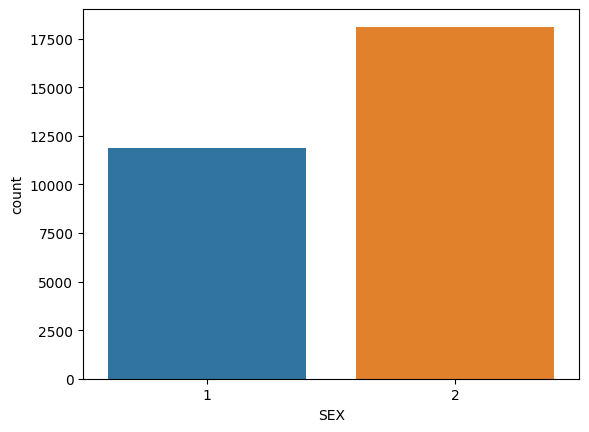

           EDUCATION     Ration
EDUCATION                      
2              14030  46.766667
1              10585  35.283333
3               4917  16.390000
5                280   0.933333
4                123   0.410000
6                 51   0.170000
0                 14   0.046667
##########################################


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


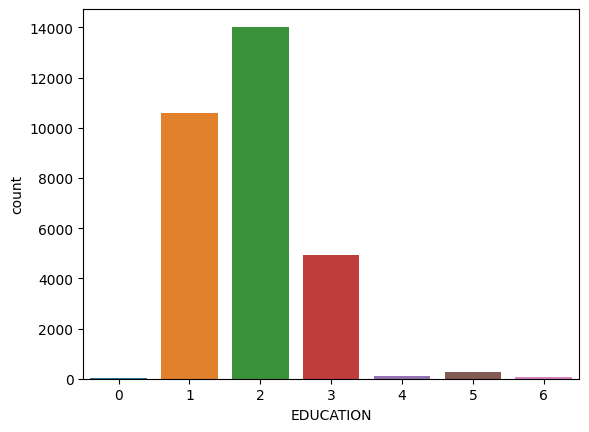

          MARRIAGE     Ration
MARRIAGE                     
2            15964  53.213333
1            13659  45.530000
3              323   1.076667
0               54   0.180000
##########################################


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


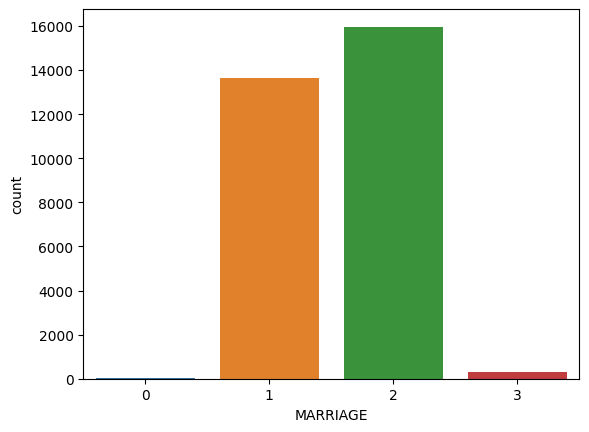

                            default.payment.next.month  Ration
default.payment.next.month                                    
0                                                23364   77.88
1                                                 6636   22.12
##########################################


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


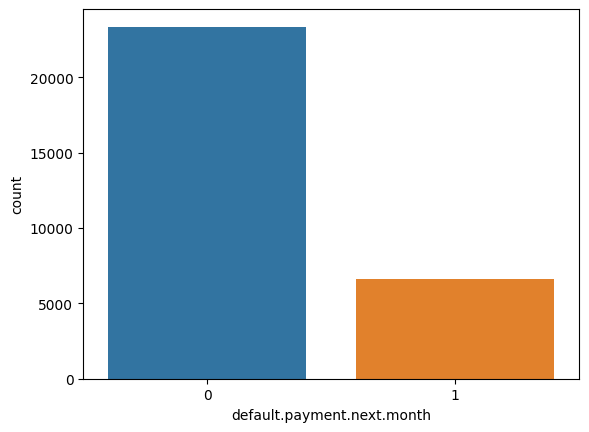

None


In [21]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


def cat_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car = grab_col_names(credit_df)
    for col in cat_cols:
        cat_summary(dataframe, col, plot=True)


print(cat_summary_df(credit_df))

count    30000.000000
mean     15000.500000
std       8660.398374
min          1.000000
1%         300.990000
5%        1500.950000
10%       3000.900000
20%       6000.800000
30%       9000.700000
40%      12000.600000
50%      15000.500000
60%      18000.400000
70%      21000.300000
80%      24000.200000
90%      27000.100000
95%      28500.050000
99%      29700.010000
max      30000.000000
Name: ID, dtype: float64


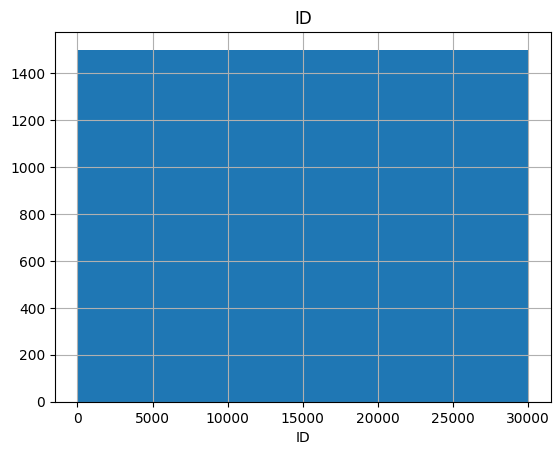

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
1%         10000.000000
5%         20000.000000
10%        30000.000000
20%        50000.000000
30%        70000.000000
40%       100000.000000
50%       140000.000000
60%       180000.000000
70%       210000.000000
80%       270000.000000
90%       360000.000000
95%       430000.000000
99%       500000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


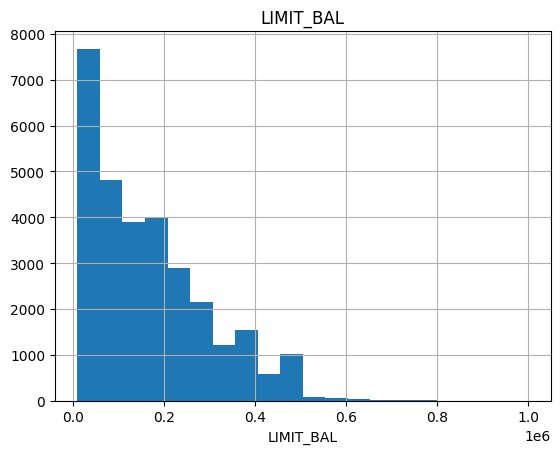

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
1%          22.000000
5%          23.000000
10%         25.000000
20%         27.000000
30%         29.000000
40%         31.000000
50%         34.000000
60%         37.000000
70%         40.000000
80%         43.000000
90%         49.000000
95%         53.000000
99%         60.000000
max         79.000000
Name: AGE, dtype: float64


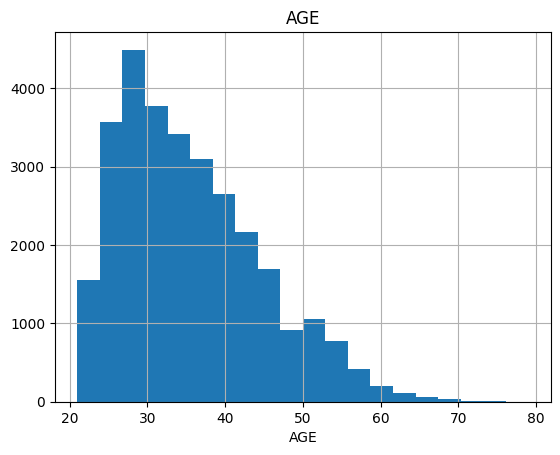

count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
1%          -2.000000
5%          -2.000000
10%         -1.000000
20%         -1.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          1.000000
90%          2.000000
95%          2.000000
99%          3.000000
max          8.000000
Name: PAY_0, dtype: float64


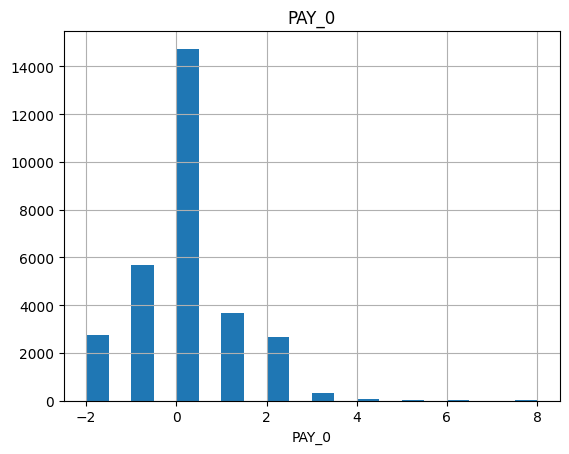

count    30000.000000
mean        -0.133767
std          1.197186
min         -2.000000
1%          -2.000000
5%          -2.000000
10%         -2.000000
20%         -1.000000
30%         -1.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          2.000000
95%          2.000000
99%          3.000000
max          8.000000
Name: PAY_2, dtype: float64


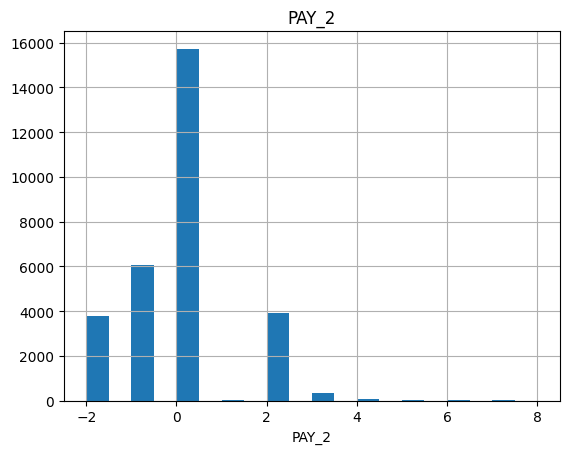

count    30000.000000
mean        -0.166200
std          1.196868
min         -2.000000
1%          -2.000000
5%          -2.000000
10%         -2.000000
20%         -1.000000
30%         -1.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          2.000000
95%          2.000000
99%          3.000000
max          8.000000
Name: PAY_3, dtype: float64


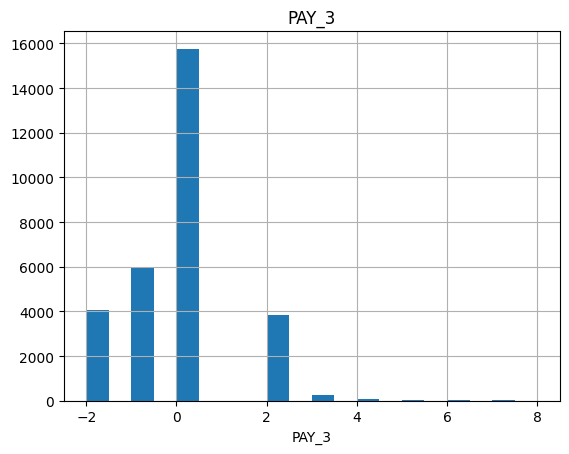

count    30000.000000
mean        -0.220667
std          1.169139
min         -2.000000
1%          -2.000000
5%          -2.000000
10%         -2.000000
20%         -1.000000
30%         -1.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          2.000000
95%          2.000000
99%          3.000000
max          8.000000
Name: PAY_4, dtype: float64


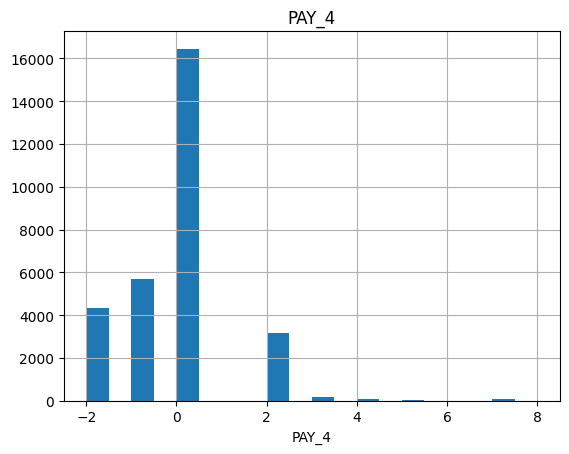

count    30000.000000
mean        -0.266200
std          1.133187
min         -2.000000
1%          -2.000000
5%          -2.000000
10%         -2.000000
20%         -1.000000
30%         -1.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          2.000000
99%          3.000000
max          8.000000
Name: PAY_5, dtype: float64


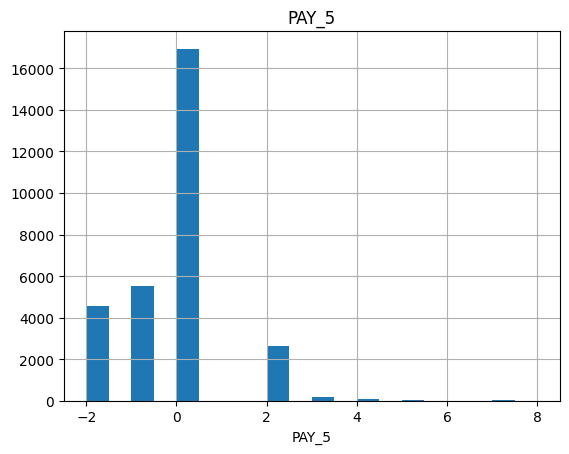

count    30000.000000
mean        -0.291100
std          1.149988
min         -2.000000
1%          -2.000000
5%          -2.000000
10%         -2.000000
20%         -1.000000
30%         -1.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          2.000000
95%          2.000000
99%          3.000000
max          8.000000
Name: PAY_6, dtype: float64


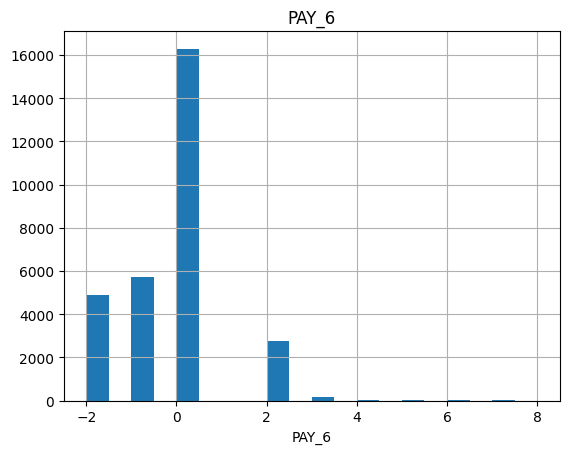

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
1%          -81.000000
5%            0.000000
10%         278.900000
20%        1892.800000
30%        6050.400000
40%       13469.200000
50%       22381.500000
60%       37045.200000
70%       52204.900000
80%       83421.200000
90%      142133.700000
95%      201203.050000
99%      350110.680000
max      964511.000000
Name: BILL_AMT1, dtype: float64


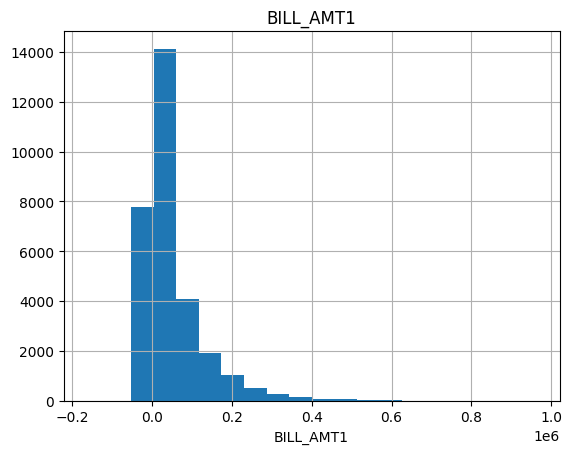

count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
1%         -200.000000
5%            0.000000
10%           0.000000
20%        1472.800000
30%        5500.000000
40%       12799.600000
50%       21200.000000
60%       34773.800000
70%       50690.000000
80%       80292.200000
90%      136905.500000
95%      194792.200000
99%      337495.280000
max      983931.000000
Name: BILL_AMT2, dtype: float64


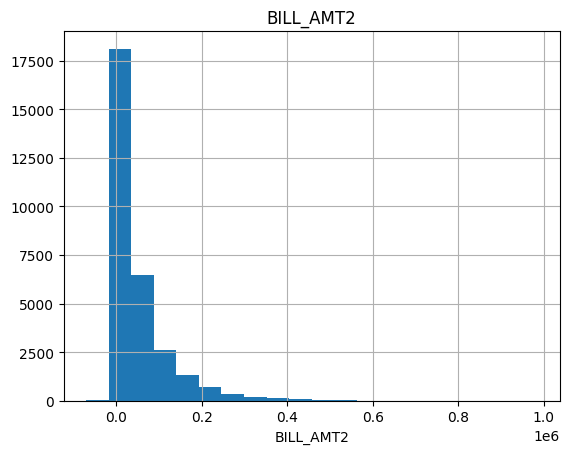

count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
1%      -2.000000e+02
5%       0.000000e+00
10%      0.000000e+00
20%      1.187800e+03
30%      5.219200e+03
40%      1.219720e+04
50%      2.008850e+04
60%      3.140100e+04
70%      4.921730e+04
80%      7.677740e+04
90%      1.320513e+05
95%      1.878210e+05
99%      3.250304e+05
max      1.664089e+06
Name: BILL_AMT3, dtype: float64


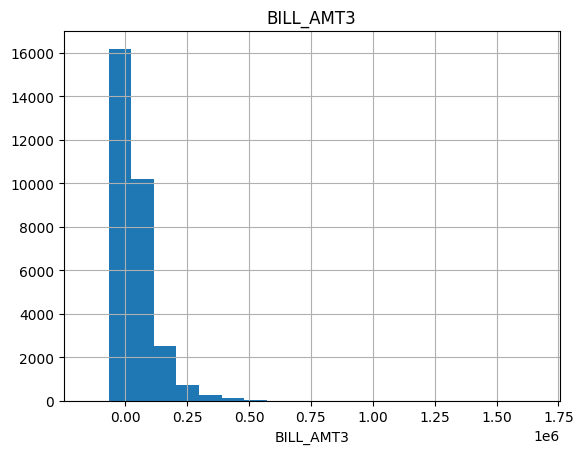

count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
1%         -212.020000
5%            0.000000
10%           0.000000
20%         988.000000
30%        4643.700000
40%       11145.000000
50%       19052.000000
60%       28604.400000
70%       45456.600000
80%       70579.000000
90%      122418.700000
95%      174333.350000
99%      304997.270000
max      891586.000000
Name: BILL_AMT4, dtype: float64


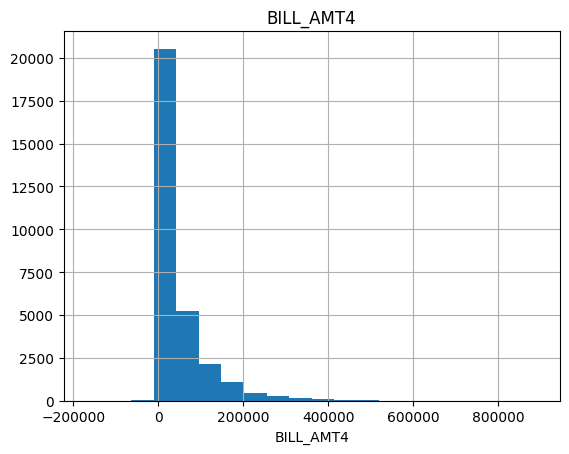

count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
1%         -232.010000
5%            0.000000
10%           0.000000
20%         763.000000
30%        3637.000000
40%        9809.200000
50%       18104.500000
60%       26690.400000
70%       40943.200000
80%       65823.000000
90%      115883.000000
95%      165794.300000
99%      285868.330000
max      927171.000000
Name: BILL_AMT5, dtype: float64


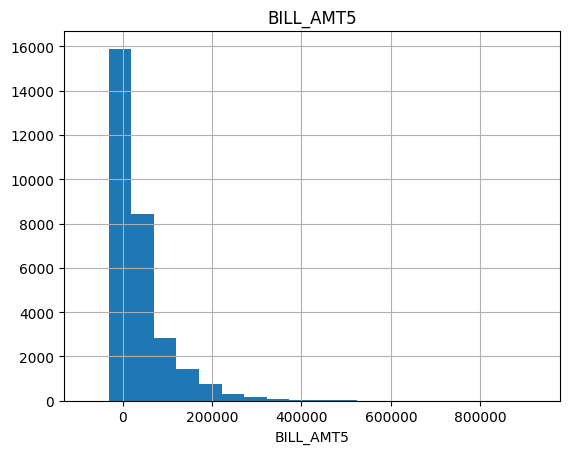

count     30000.000000
mean      38871.760400
std       59554.107537
min     -339603.000000
1%         -331.030000
5%            0.000000
10%           0.000000
20%         476.000000
30%        2701.700000
40%        8770.200000
50%       17071.000000
60%       25508.400000
70%       39252.200000
80%       63150.600000
90%      112110.400000
95%      161912.000000
99%      279505.060000
max      961664.000000
Name: BILL_AMT6, dtype: float64


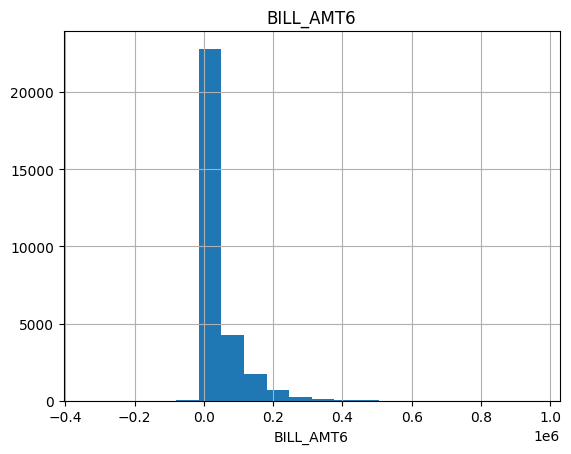

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
20%         316.000000
30%        1263.700000
40%        1724.000000
50%        2100.000000
60%        3000.000000
70%        4309.300000
80%        6192.200000
90%       10300.000000
95%       18428.200000
99%       66522.180000
max      873552.000000
Name: PAY_AMT1, dtype: float64


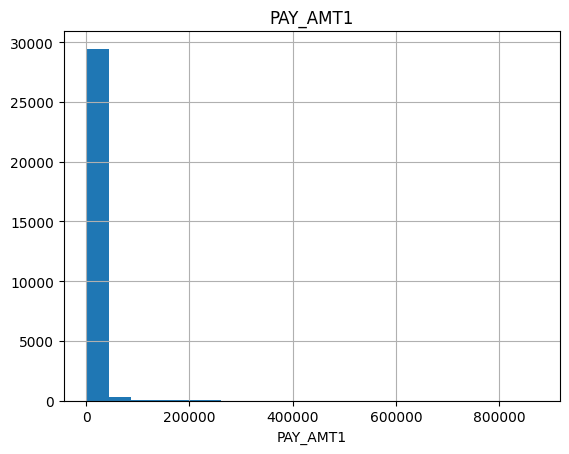

count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
1%       0.000000e+00
5%       0.000000e+00
10%      0.000000e+00
20%      2.688000e+02
30%      1.165000e+03
40%      1.600000e+03
50%      2.009000e+03
60%      3.000000e+03
70%      4.045300e+03
80%      6.000000e+03
90%      1.040110e+04
95%      1.900435e+04
99%      7.665102e+04
max      1.684259e+06
Name: PAY_AMT2, dtype: float64


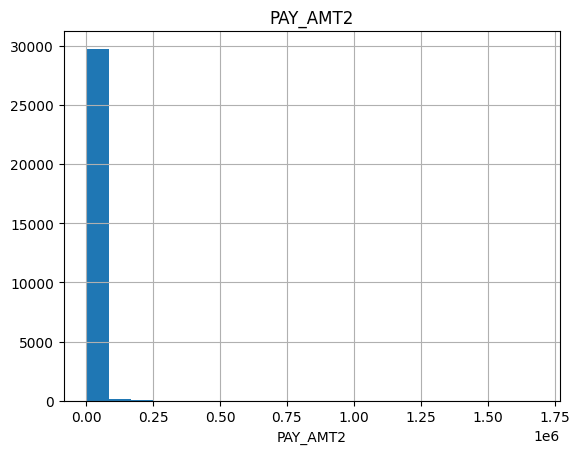

count     30000.00000
mean       5225.68150
std       17606.96147
min           0.00000
1%            0.00000
5%            0.00000
10%           0.00000
20%           2.80000
30%         780.00000
40%        1206.00000
50%        1800.00000
60%        2500.00000
70%        3560.30000
80%        5284.00000
90%       10000.00000
95%       17589.40000
99%       70000.00000
max      896040.00000
Name: PAY_AMT3, dtype: float64


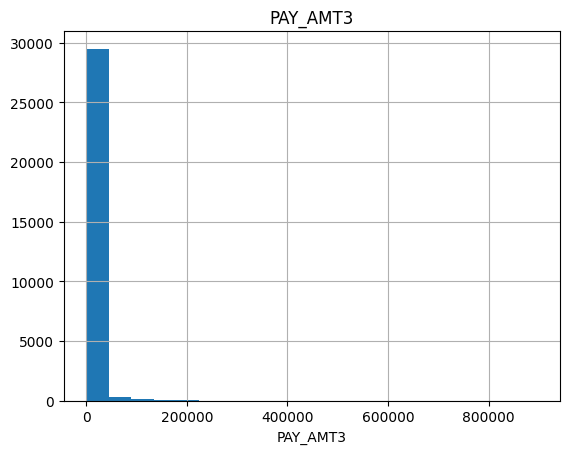

count     30000.000000
mean       4826.076867
std       15666.159744
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
20%           0.000000
30%         500.000000
40%        1000.000000
50%        1500.000000
60%        2100.000000
70%        3200.000000
80%        5000.000000
90%        9570.600000
95%       16014.950000
99%       67054.440000
max      621000.000000
Name: PAY_AMT4, dtype: float64


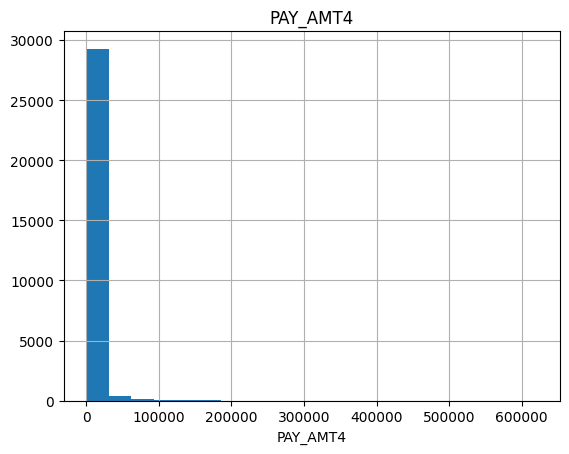

count     30000.000000
mean       4799.387633
std       15278.305679
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
20%           0.000000
30%         500.000000
40%        1000.000000
50%        1500.000000
60%        2123.400000
70%        3200.000000
80%        5000.000000
90%        9500.000000
95%       16000.000000
99%       65607.560000
max      426529.000000
Name: PAY_AMT5, dtype: float64


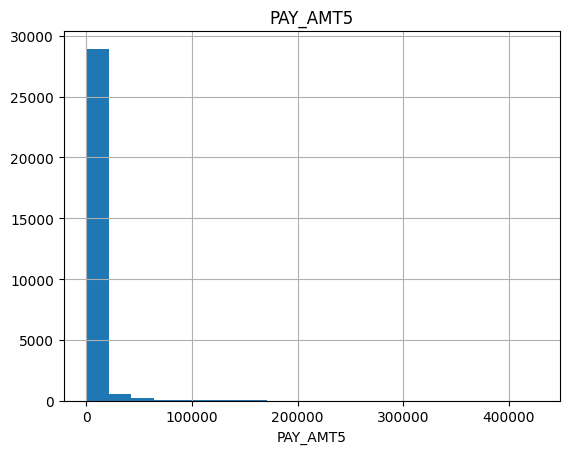

count     30000.000000
mean       5215.502567
std       17777.465775
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
20%           0.000000
30%         426.000000
40%        1000.000000
50%        1500.000000
60%        2100.000000
70%        3200.000000
80%        5000.000000
90%        9600.000000
95%       17343.800000
99%       82619.050000
max      528666.000000
Name: PAY_AMT6, dtype: float64


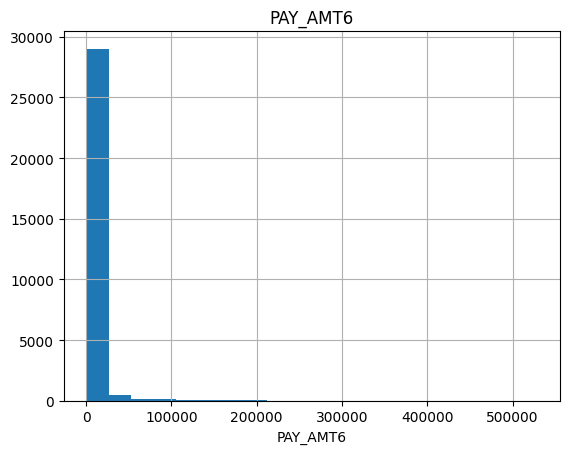

None


In [22]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40,
               0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)


def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(credit_df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)


print(num_summary_df(credit_df))


# ***Data Visualization***

In [23]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

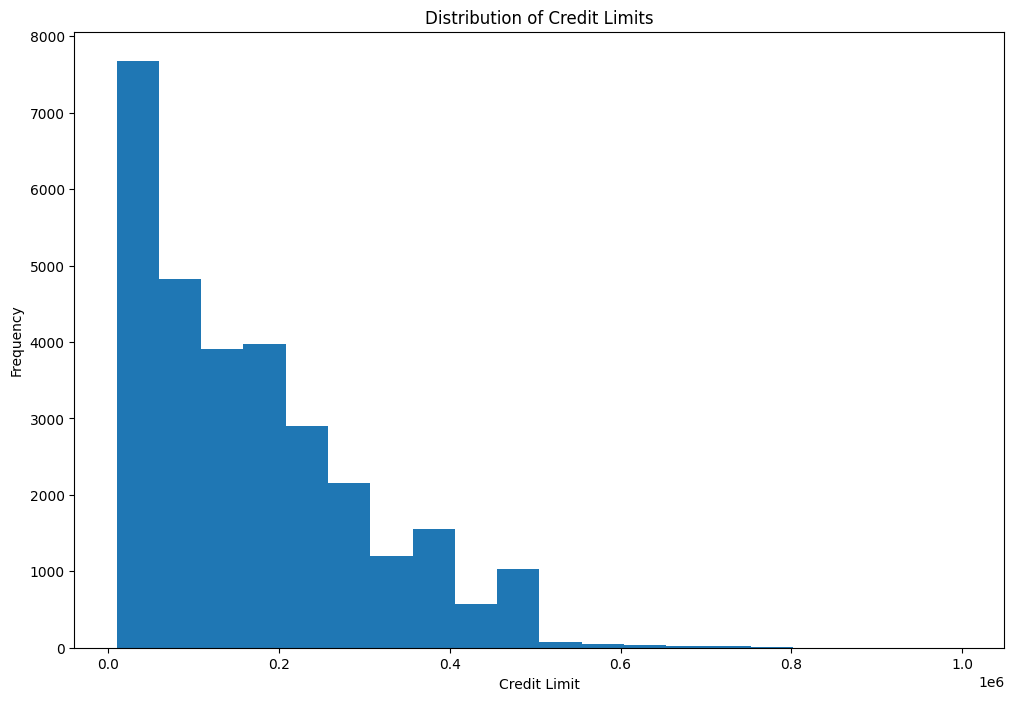

In [24]:
# Data Distribution (Histograms)
plt.figure(figsize=(12, 8))
credit_df['LIMIT_BAL'].plot(kind='hist', bins=20,
                       title='Distribution of Credit Limits')
plt.xlabel('Credit Limit')
plt.show()


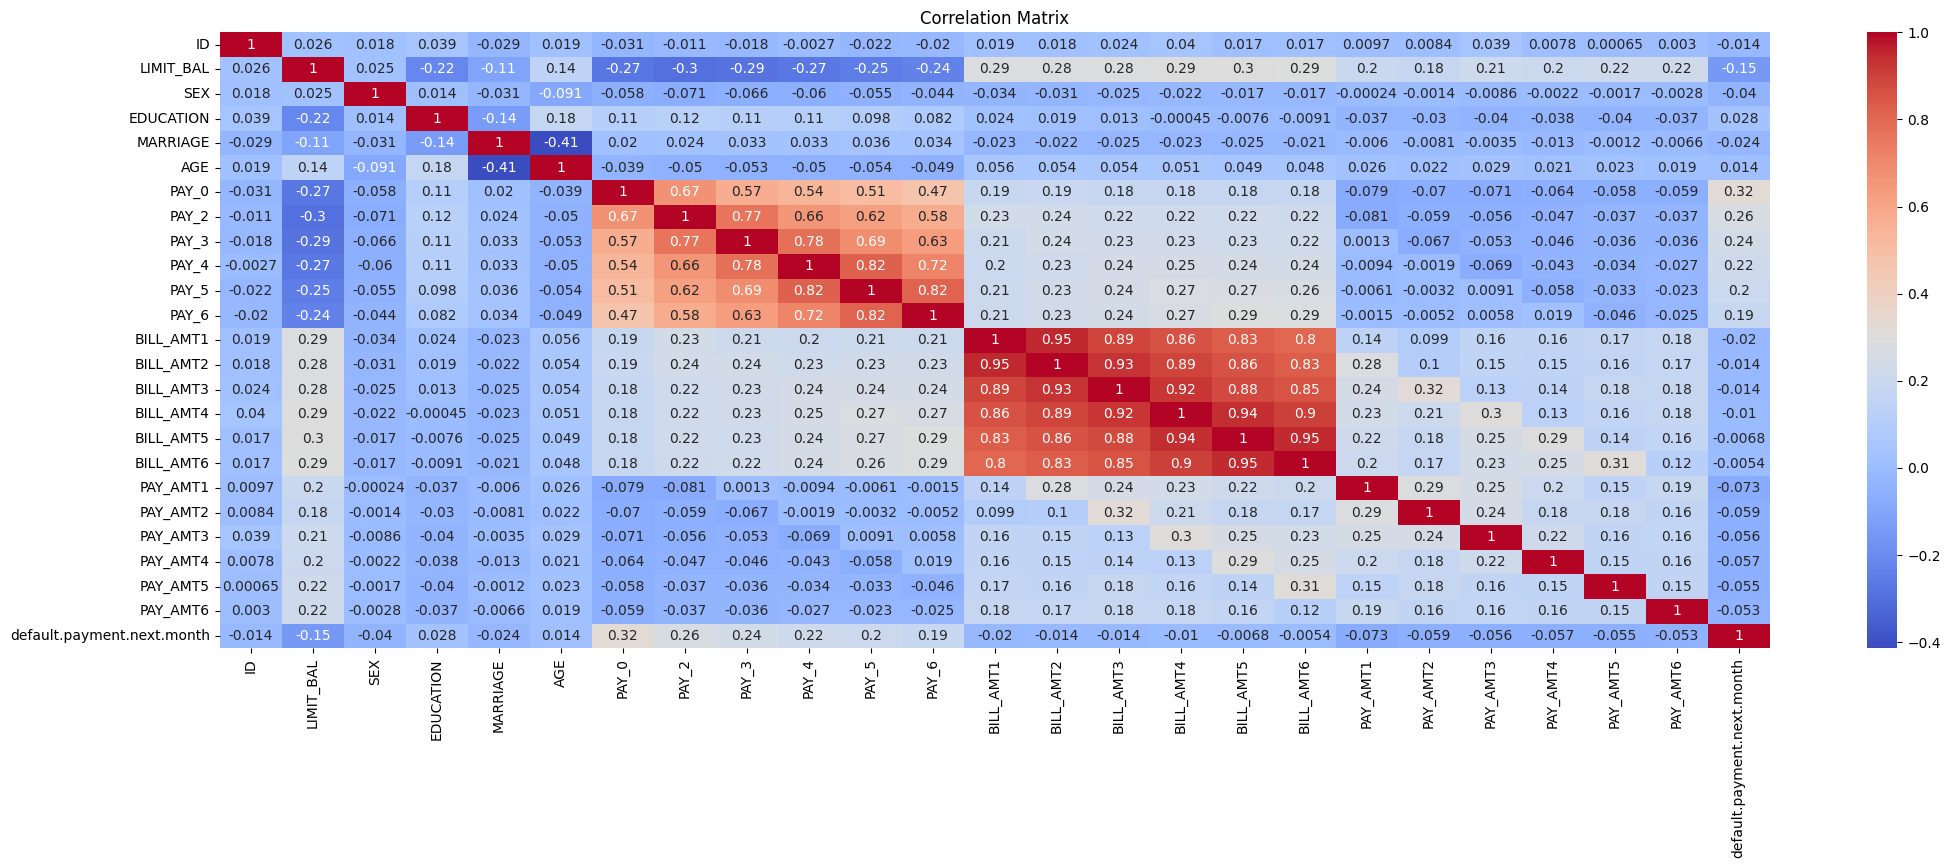

In [25]:
# Correlation Analysis
correlation_matrix = credit_df.corr()
plt.figure(figsize=(25, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Grouped Analysis (e.g., by EDUCATION)
grouped_education = credit_df.groupby('EDUCATION')['LIMIT_BAL'].mean()

# Default Rate Analysis
default_rate = (credit_df['default.payment.next.month'] == 1).mean()

# Payment History Analysis
payment_history_summary = credit_df[['PAY_0', 'PAY_2',
                                'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


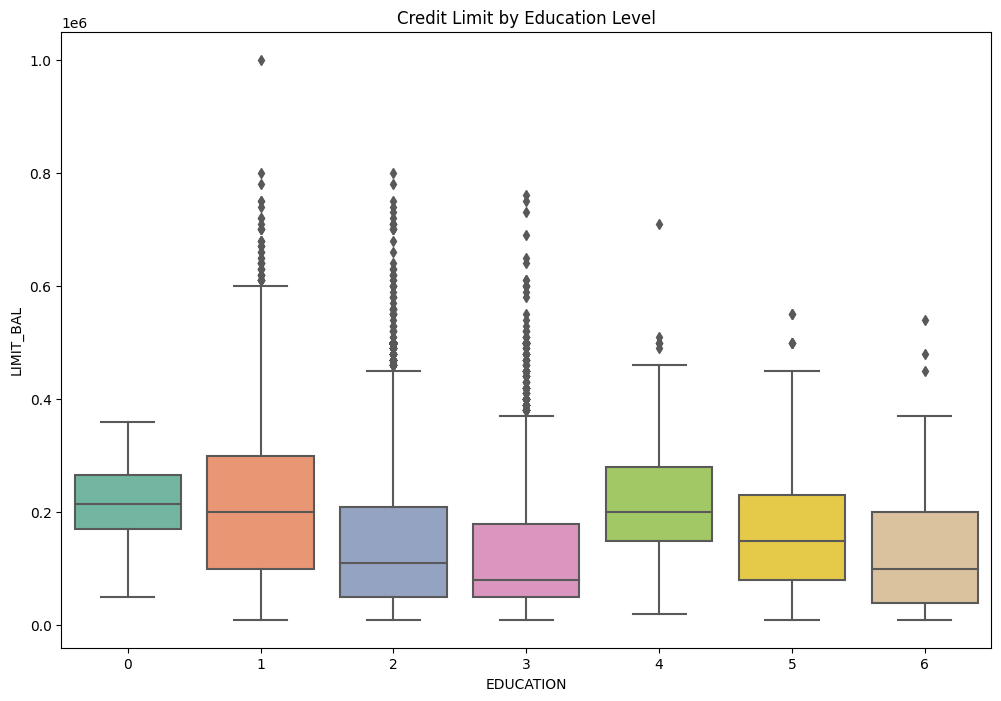

In [27]:
# Credit Limit vs. Age Analysis
plt.figure(figsize=(12, 8))
sns.boxplot(x='EDUCATION', y='LIMIT_BAL', data=credit_df, palette='Set2')
plt.title('Credit Limit by Education Level')
plt.show()


# ***Visualizing Missing Data***

In [28]:
credit_df.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<Axes: >

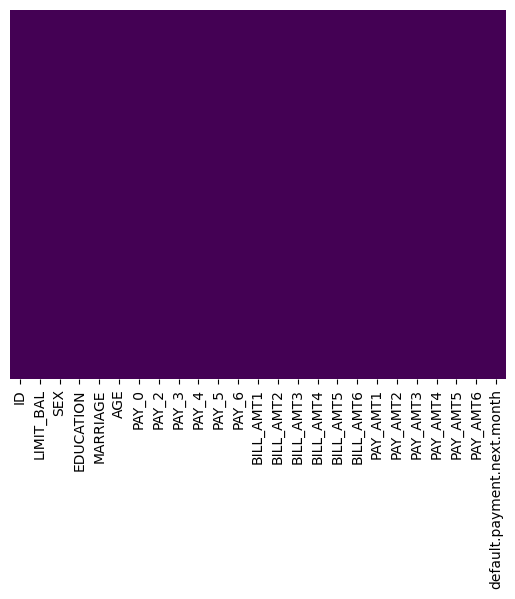

In [30]:
sns.heatmap(credit_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# ***Univariate Analysis***

***SEX Features***

In [31]:
# replacing the numerical values with 'M' and 'F'
# credit_df['SEX'] = credit_df['SEX'].replace({1: 'M', 2: 'F'})

In [32]:
credit_df['SEX'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 0 to 29999
Series name: SEX
Non-Null Count  Dtype
--------------  -----
30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB


<Axes: ylabel='SEX'>

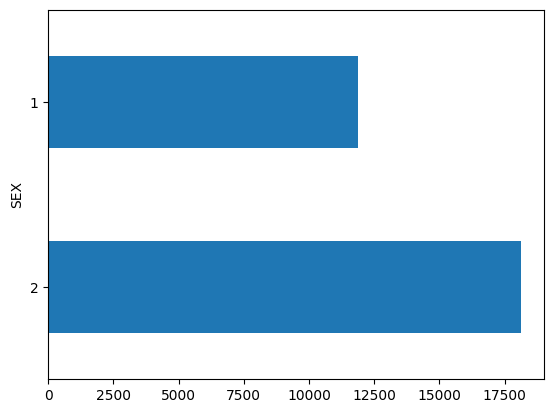

In [33]:
credit_df['SEX'].value_counts().plot(kind='barh')


In [34]:
sex_disgroup = credit_df.groupby(by='SEX')
sex_group_count = sex_disgroup.count()


In [35]:
sex_group_count.head()


,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
SEX,,,,,,,,,,,,,,,,,,,,,
1,11888,11888,11888,11888,11888,11888,11888,11888,11888,11888,...,11888,11888,11888,11888,11888,11888,11888,11888,11888,11888
2,18112,18112,18112,18112,18112,18112,18112,18112,18112,18112,...,18112,18112,18112,18112,18112,18112,18112,18112,18112,18112


In [36]:
credit_df['SEX'].unique()

array([2, 1], dtype=int64)

In [37]:
# Count values for males (M)
count_male = len(credit_df[credit_df['SEX'] == 'M']['SEX'])

# Count values for females (F)
count_female = len(credit_df[credit_df['SEX'] == 'F']['SEX'])

print("Number of values for males (M) in 'SEX' column:", count_male)
print("Number of values for females (F) in 'SEX' column:", count_female)

Number of values for males (M) in 'SEX' column: 0
Number of values for females (F) in 'SEX' column: 0


***EDUCATION Features***

In [38]:
credit_df['EDUCATION'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 0 to 29999
Series name: EDUCATION
Non-Null Count  Dtype
--------------  -----
30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB


In [39]:
credit_df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

<Axes: ylabel='EDUCATION'>

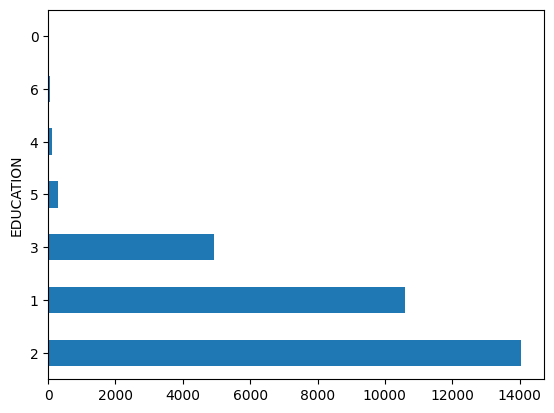

In [40]:
credit_df['EDUCATION'].value_counts().plot(kind='barh')


In [41]:
education_disgroup = credit_df.groupby(by='EDUCATION')
education_group_count = education_disgroup.count()

In [42]:
education_group_count.head()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1,10585,10585,10585,10585,10585,10585,10585,10585,10585,10585,...,10585,10585,10585,10585,10585,10585,10585,10585,10585,10585
2,14030,14030,14030,14030,14030,14030,14030,14030,14030,14030,...,14030,14030,14030,14030,14030,14030,14030,14030,14030,14030
3,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917,...,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917
4,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123


***INT Datatype Features***

In [43]:
credit_df['AGE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 0 to 29999
Series name: AGE
Non-Null Count  Dtype
--------------  -----
30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB


In [44]:
credit_df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Descriptive Statistics for LIMIT_BAL:
count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


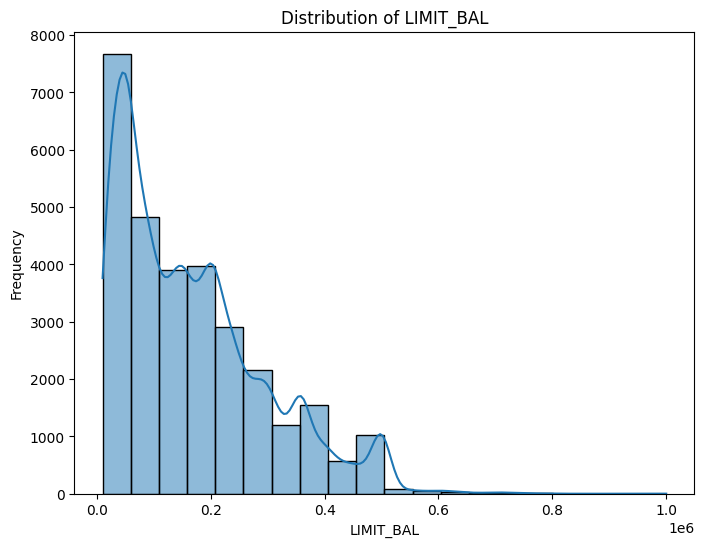

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


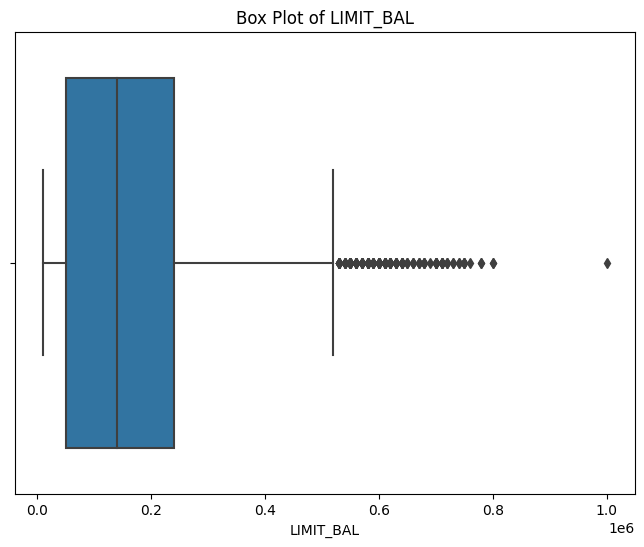

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Descriptive Statistics for AGE:
count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


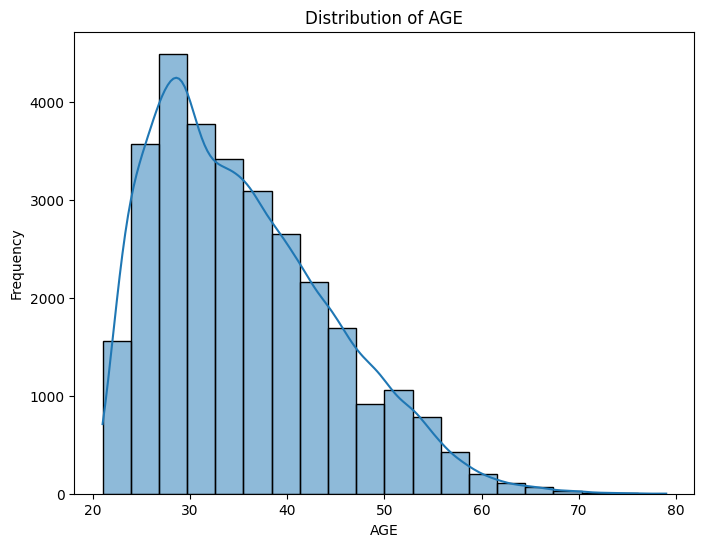

Descriptive Statistics for PAY_0:
count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_0, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


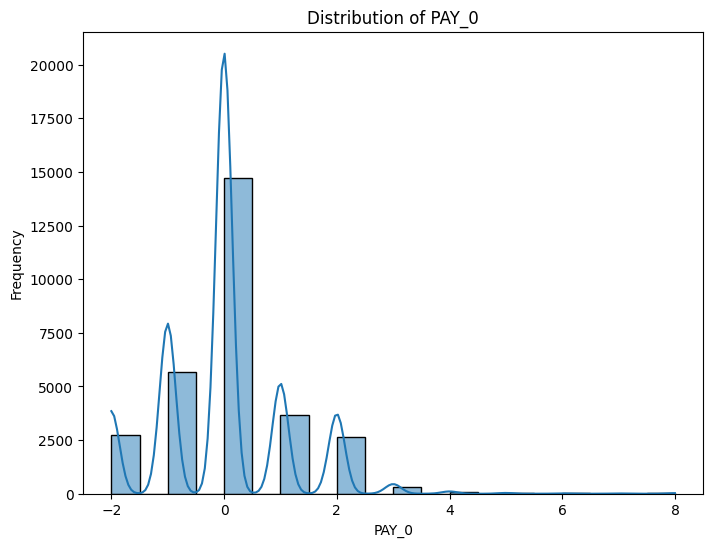

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


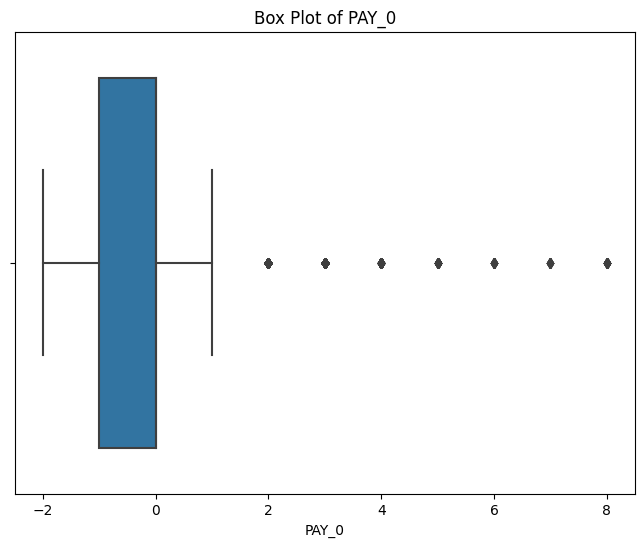

Descriptive Statistics for PAY_2:
count    30000.000000
mean        -0.133767
std          1.197186
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_2, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


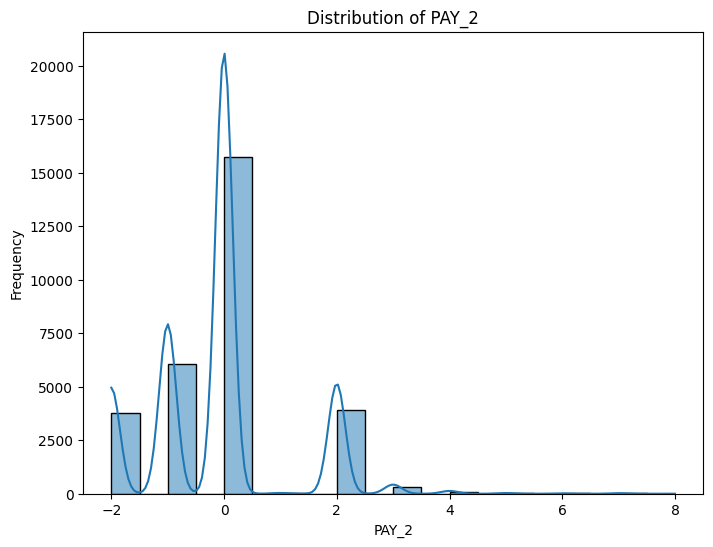

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


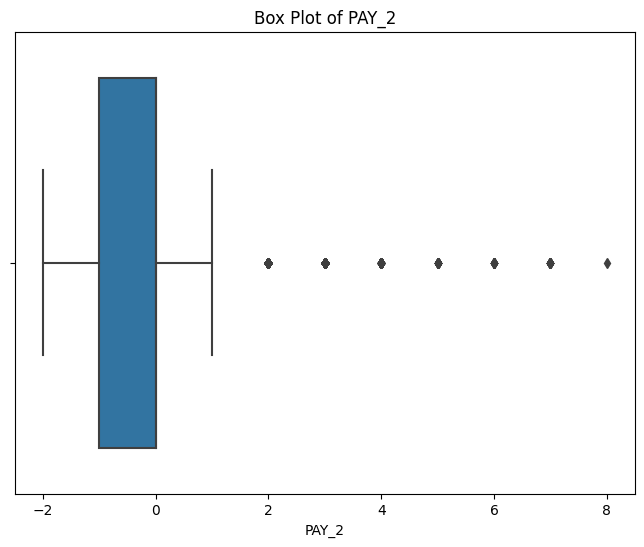

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Descriptive Statistics for PAY_3:
count    30000.000000
mean        -0.166200
std          1.196868
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_3, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


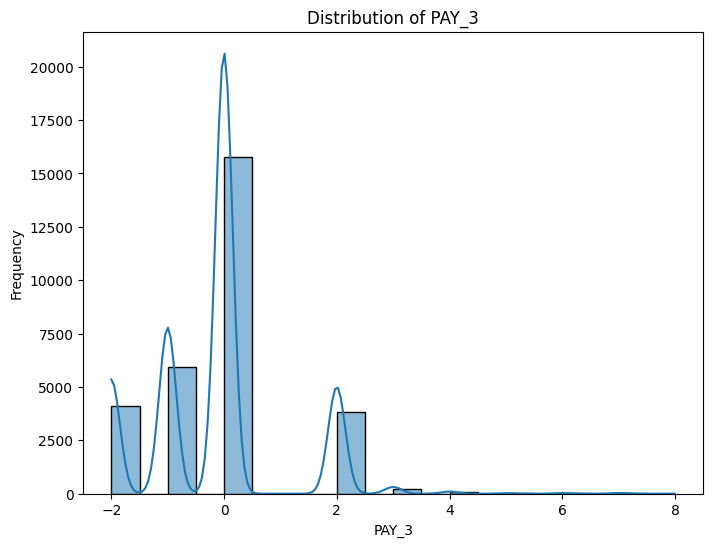

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


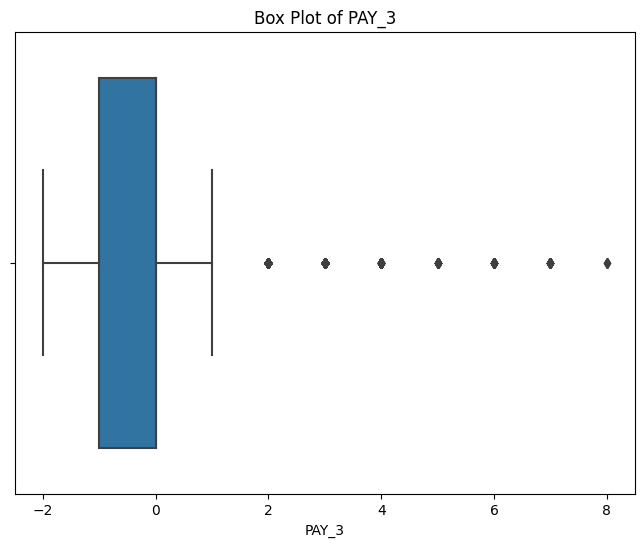

Descriptive Statistics for PAY_4:
count    30000.000000
mean        -0.220667
std          1.169139
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_4, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


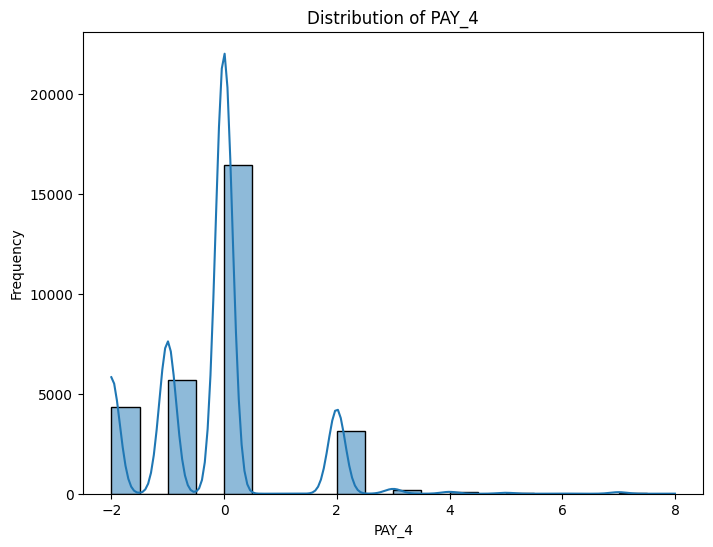

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


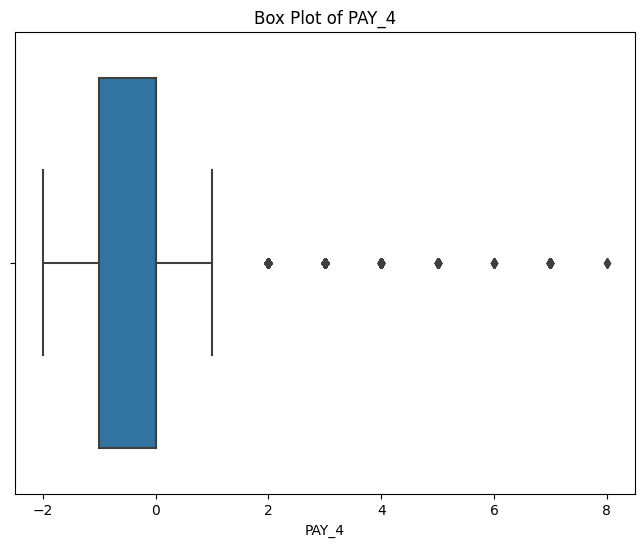

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Descriptive Statistics for PAY_5:
count    30000.000000
mean        -0.266200
std          1.133187
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_5, dtype: float64


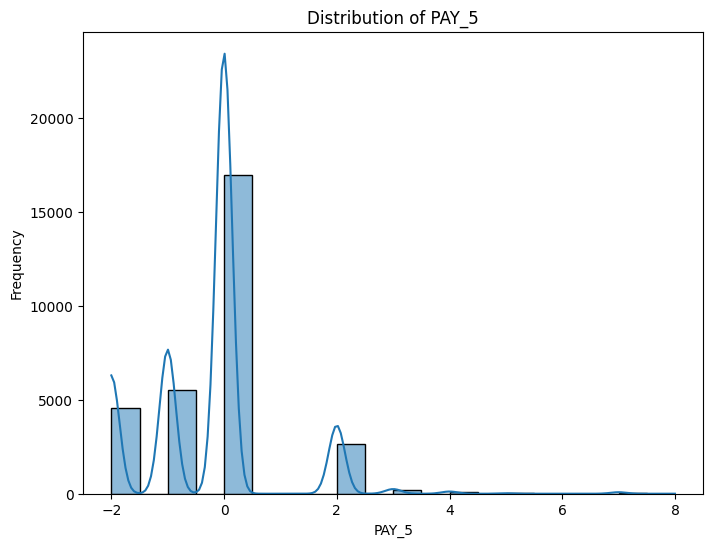

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


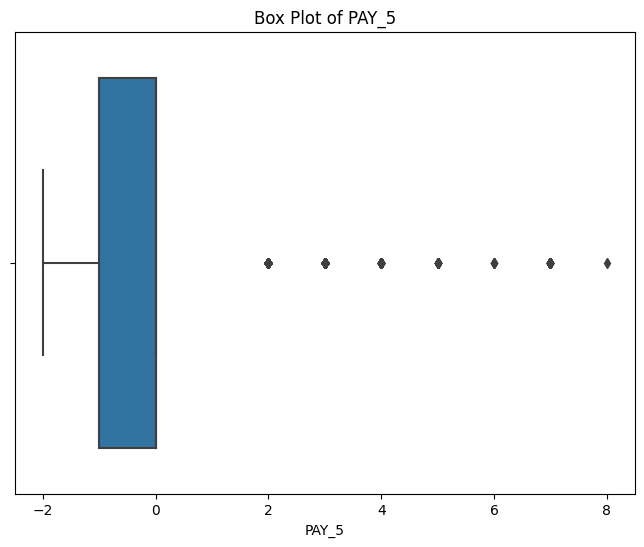

Descriptive Statistics for PAY_6:
count    30000.000000
mean        -0.291100
std          1.149988
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_6, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


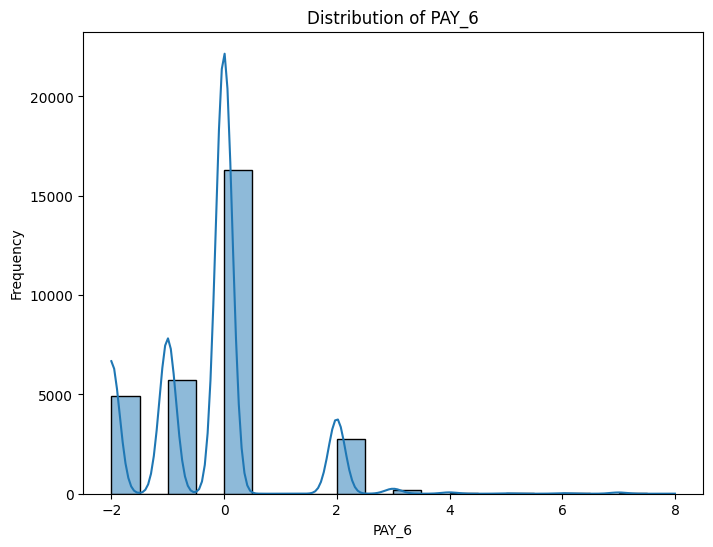

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


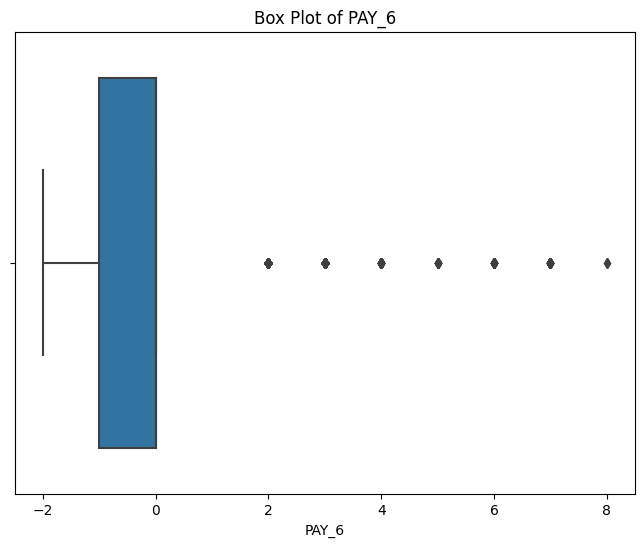

In [45]:
# List of integer columns
integer_columns = ['LIMIT_BAL', 'AGE', 'PAY_0',
                   'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Loop through each integer column for analysis
for column in integer_columns:
    # Descriptive Statistics
    print(f"Descriptive Statistics for {column}:")
    print(credit_df[column].describe())

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data=credit_df, x=column, bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot (if applicable)
    if column != 'AGE':  # Skip box plot for 'AGE' since it's not suitable
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=credit_df, x=column, orient='vertical')
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()


***Float Datatype Features***

Descriptive Statistics for LIMIT_BAL:
count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


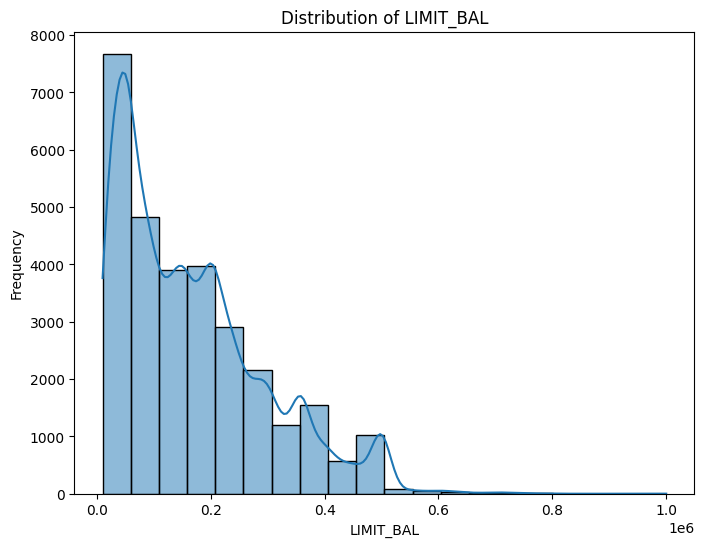

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


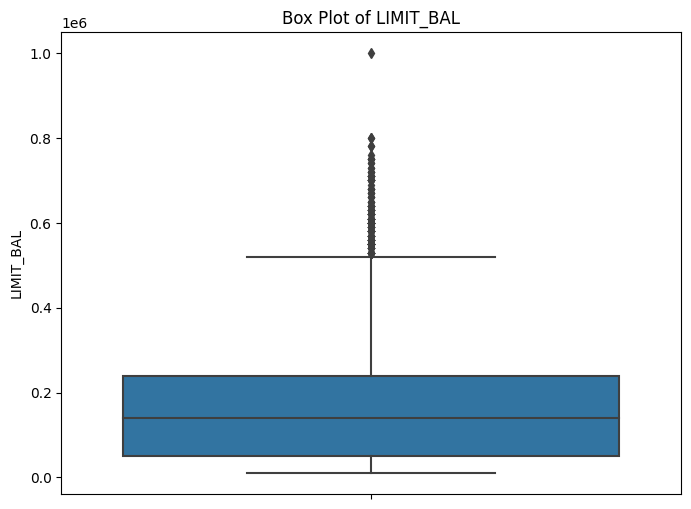

Descriptive Statistics for BILL_AMT1:
count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


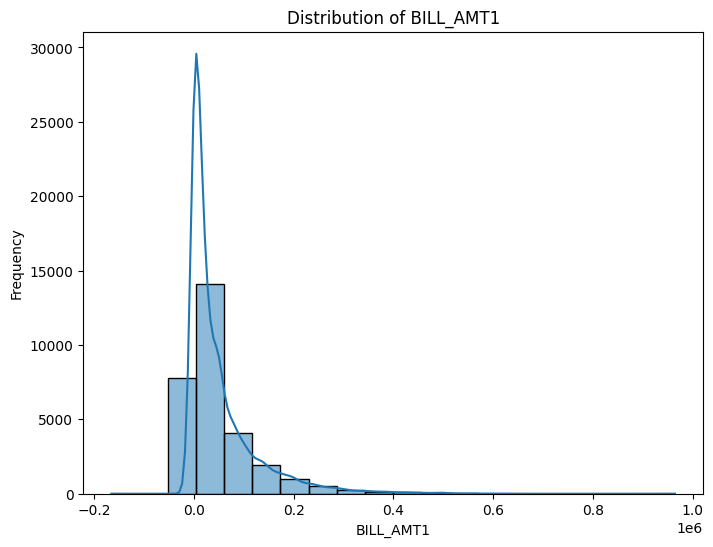

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


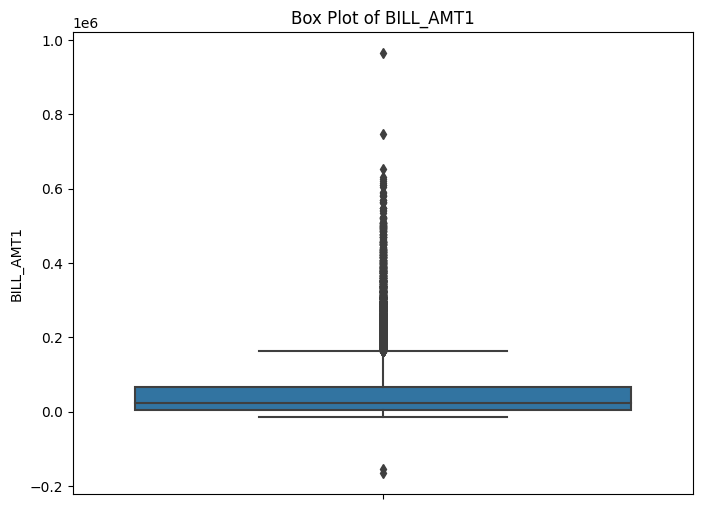

Descriptive Statistics for BILL_AMT2:
count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


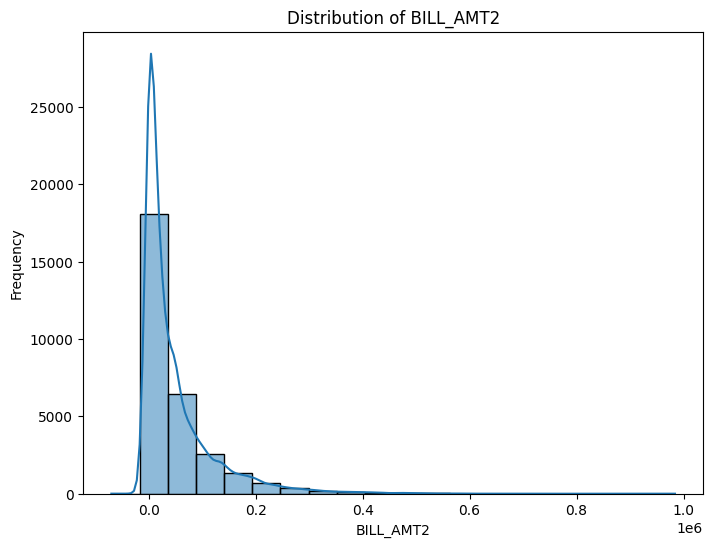

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


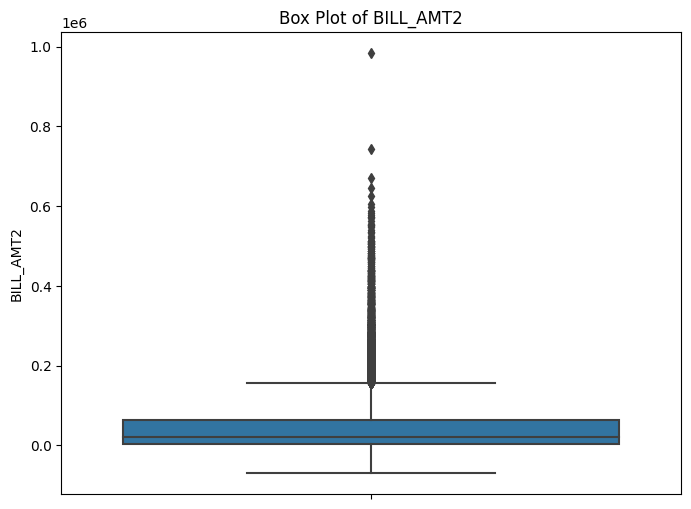

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Descriptive Statistics for BILL_AMT3:
count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64


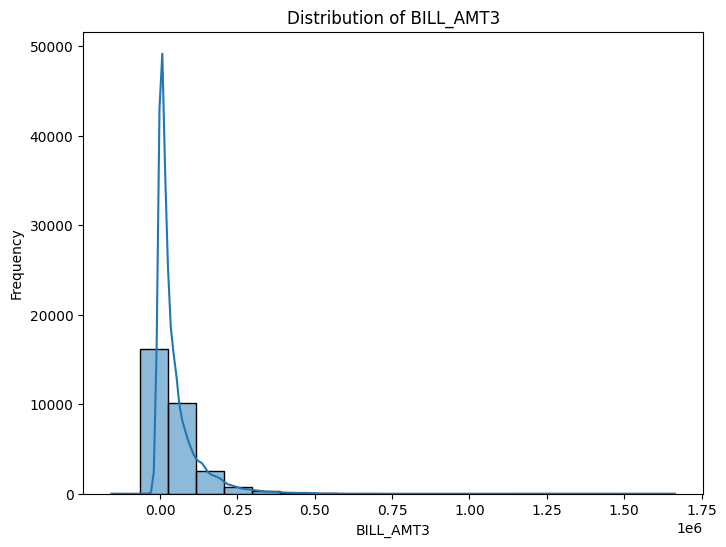

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


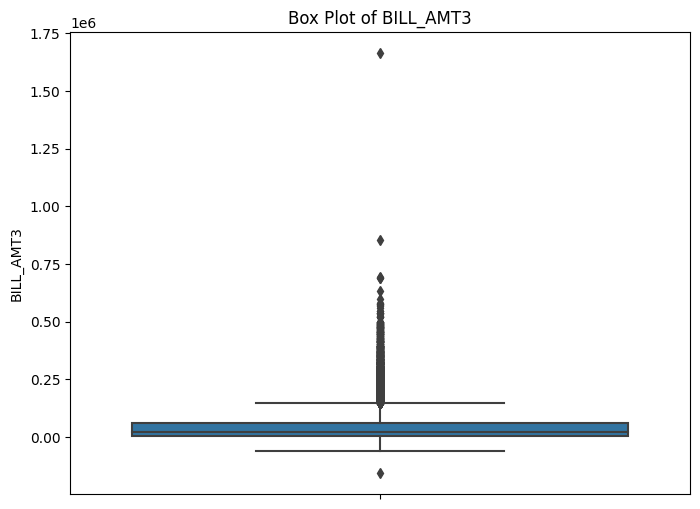

Descriptive Statistics for BILL_AMT4:
count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.000000
max      891586.000000
Name: BILL_AMT4, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


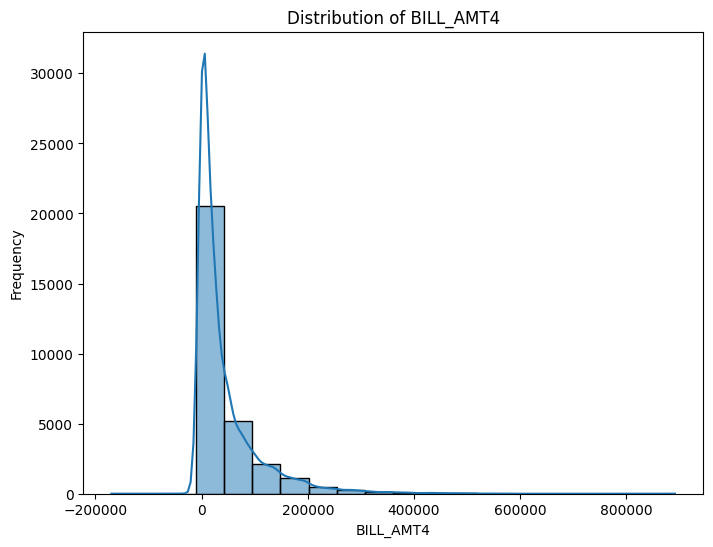

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


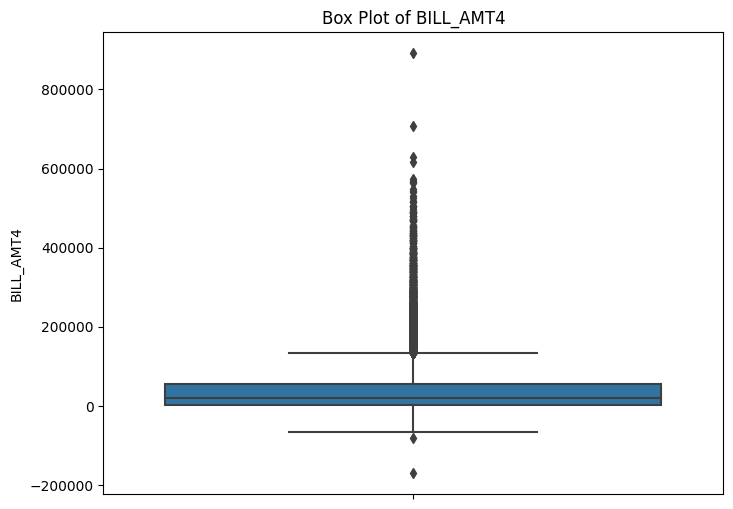

Descriptive Statistics for BILL_AMT5:
count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
25%        1763.000000
50%       18104.500000
75%       50190.500000
max      927171.000000
Name: BILL_AMT5, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


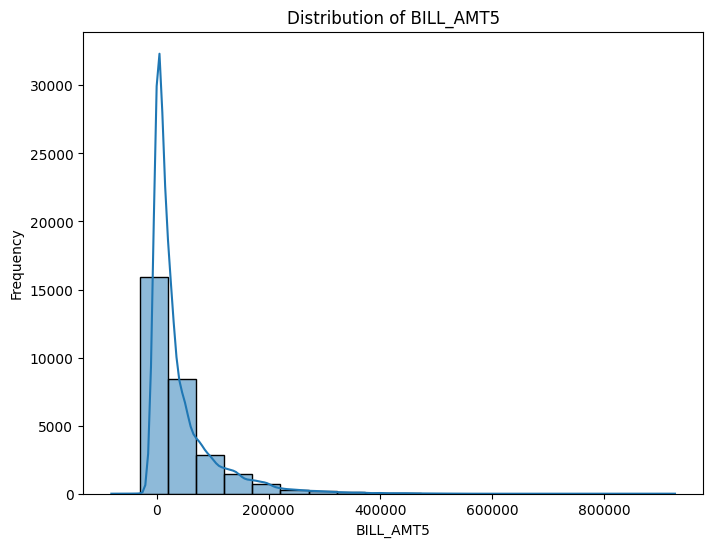

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


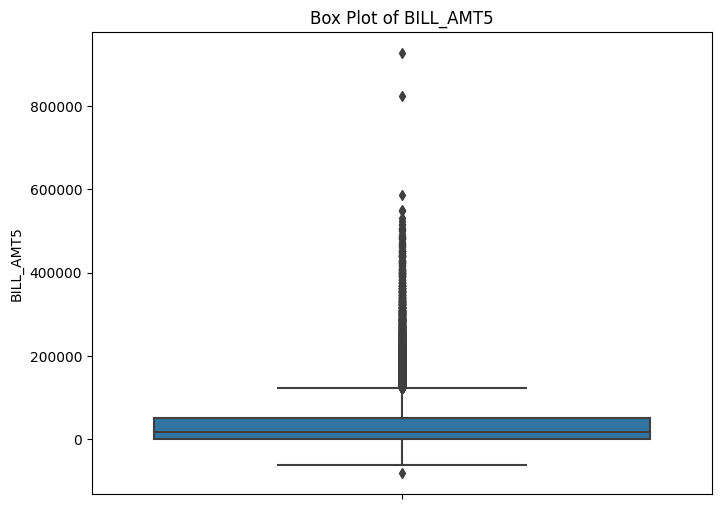

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Descriptive Statistics for BILL_AMT6:
count     30000.000000
mean      38871.760400
std       59554.107537
min     -339603.000000
25%        1256.000000
50%       17071.000000
75%       49198.250000
max      961664.000000
Name: BILL_AMT6, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


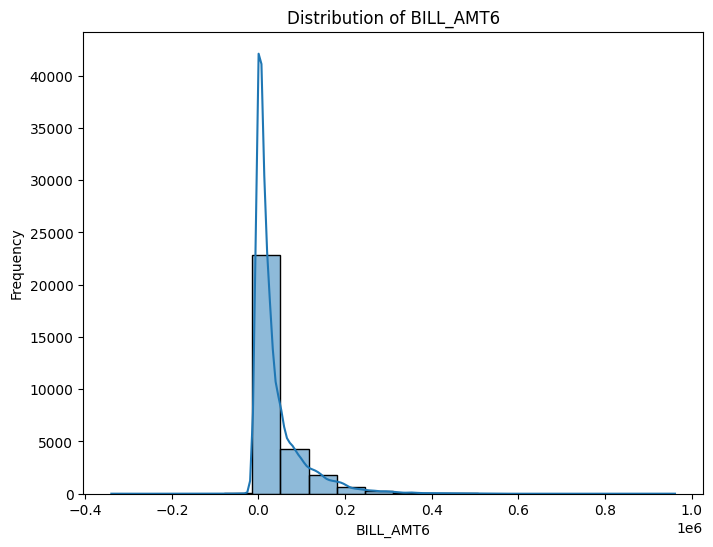

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


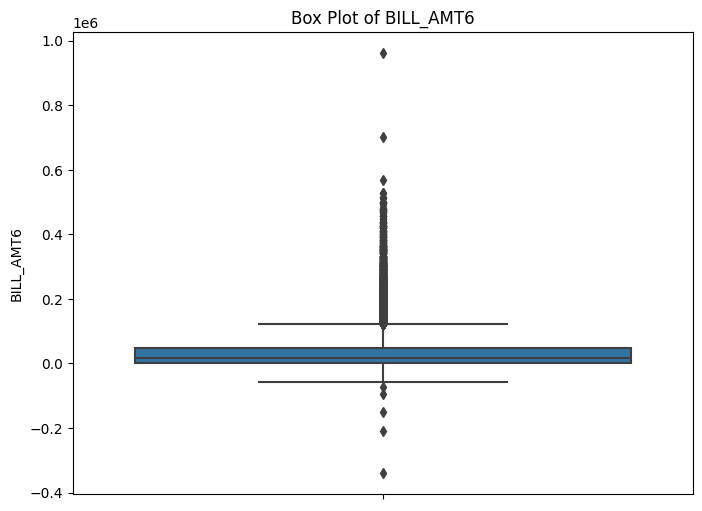

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Descriptive Statistics for PAY_AMT1:
count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64


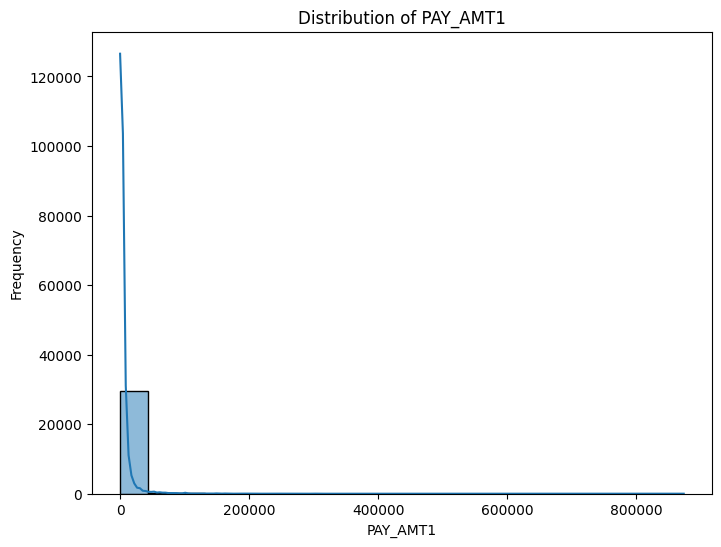

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


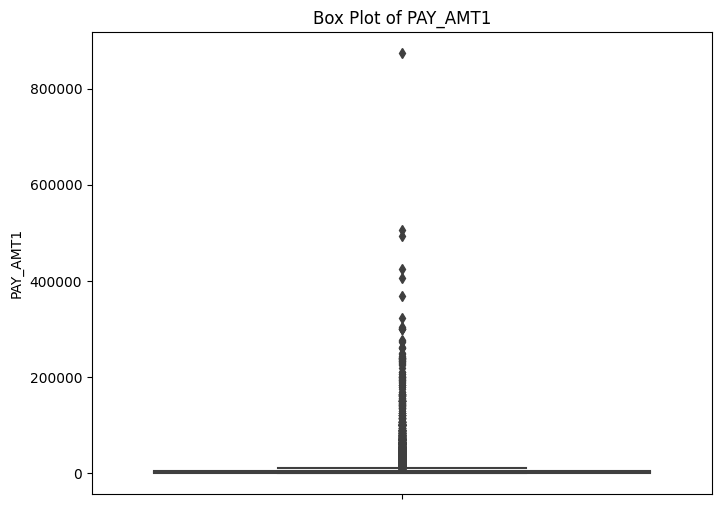

Descriptive Statistics for PAY_AMT2:
count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
25%      8.330000e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: PAY_AMT2, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


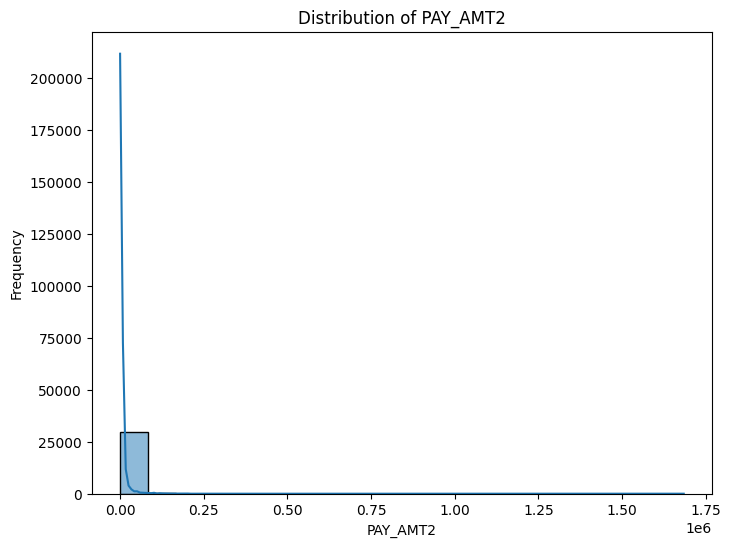

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


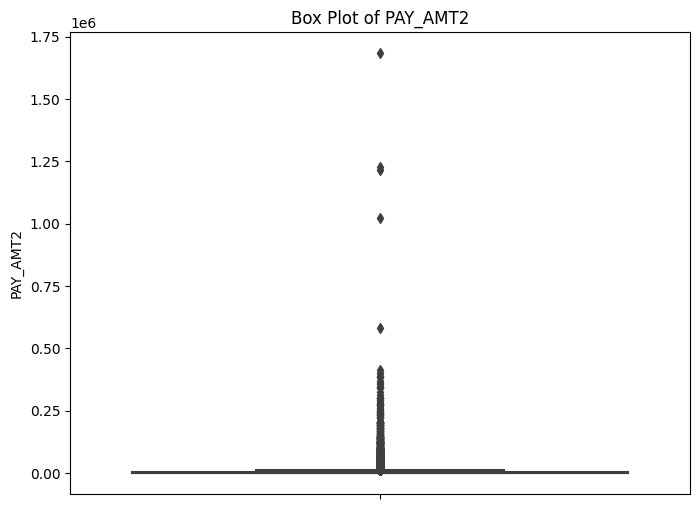

Descriptive Statistics for PAY_AMT3:
count     30000.00000
mean       5225.68150
std       17606.96147
min           0.00000
25%         390.00000
50%        1800.00000
75%        4505.00000
max      896040.00000
Name: PAY_AMT3, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


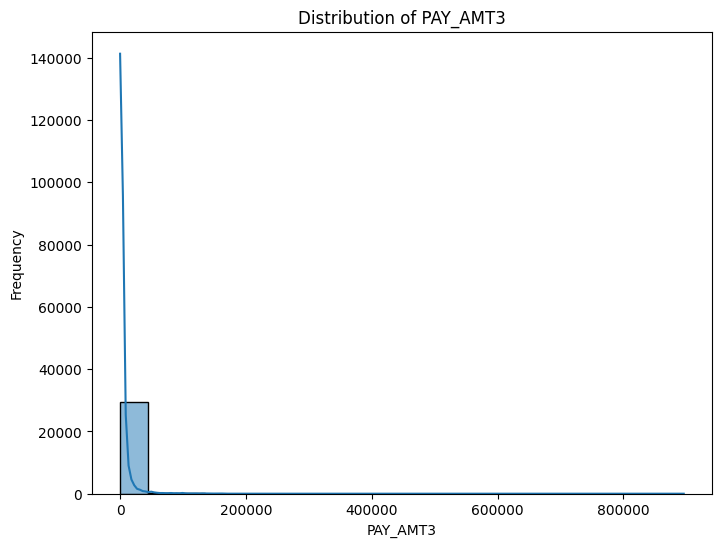

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


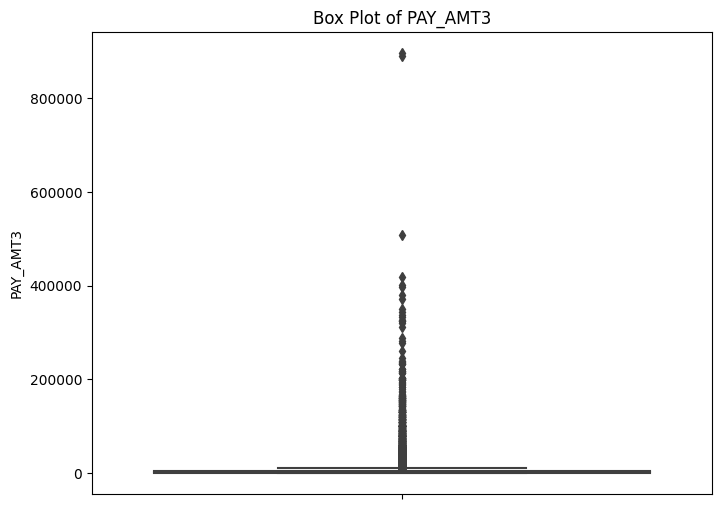

Descriptive Statistics for PAY_AMT4:
count     30000.000000
mean       4826.076867
std       15666.159744
min           0.000000
25%         296.000000
50%        1500.000000
75%        4013.250000
max      621000.000000
Name: PAY_AMT4, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


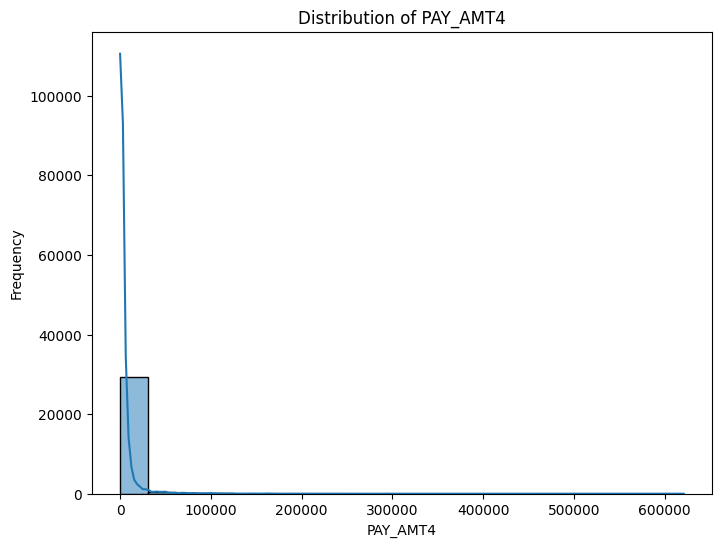

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


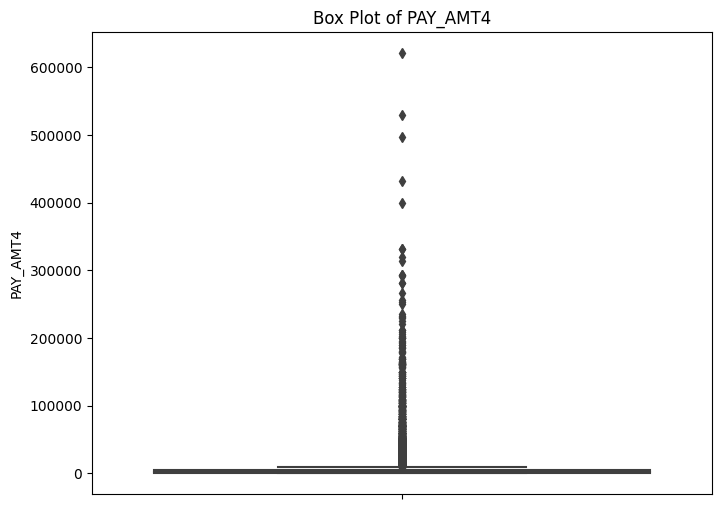

Descriptive Statistics for PAY_AMT5:
count     30000.000000
mean       4799.387633
std       15278.305679
min           0.000000
25%         252.500000
50%        1500.000000
75%        4031.500000
max      426529.000000
Name: PAY_AMT5, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


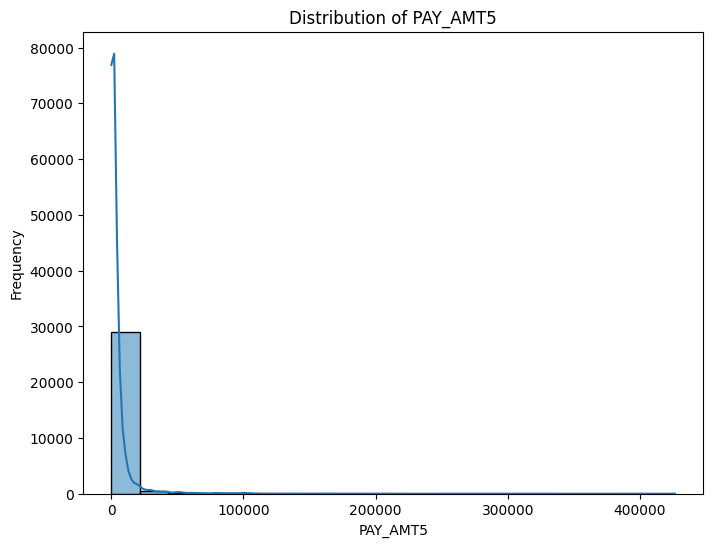

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


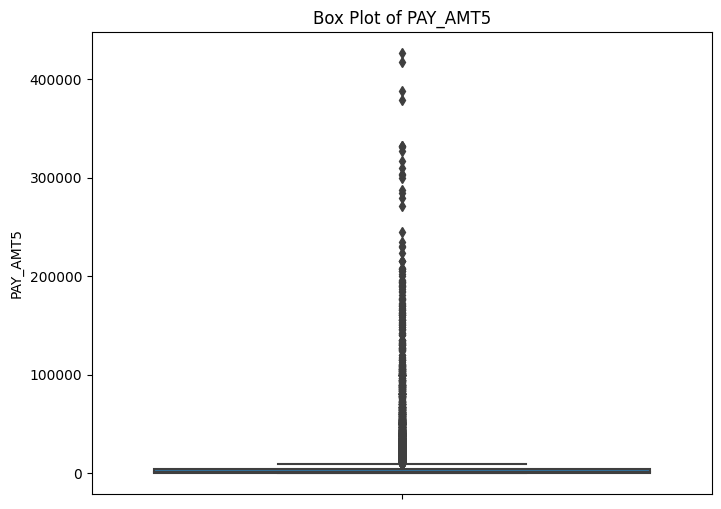

Descriptive Statistics for PAY_AMT6:
count     30000.000000
mean       5215.502567
std       17777.465775
min           0.000000
25%         117.750000
50%        1500.000000
75%        4000.000000
max      528666.000000
Name: PAY_AMT6, dtype: float64


e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


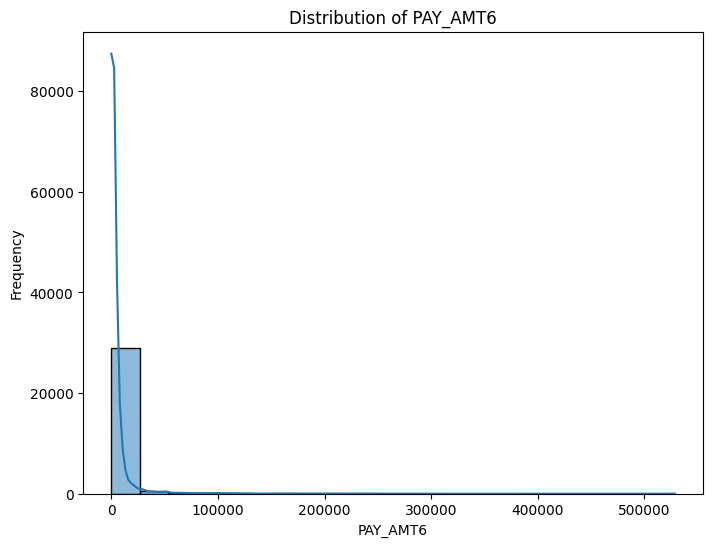

e:\i-neuron_internship\env_ineuron\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


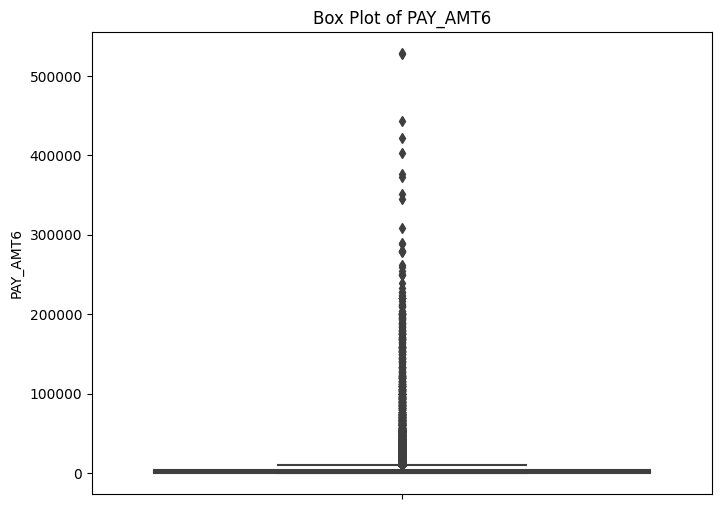

In [46]:
# Select columns with float data types
float_columns = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Loop through each float column for analysis
for column in float_columns:
    # Descriptive Statistics
    print(f"Descriptive Statistics for {column}:")
    print(credit_df[column].describe())

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data=credit_df, x=column, bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=credit_df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()


# ***PreProcessing Data***

In [47]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [48]:
credit_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


***Finding and Handling Imbalance Dataset***

In [49]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [50]:
credit_df['default.payment.next.month'].unique()

array([1, 0], dtype=int64)

In [51]:
# default.payment.next.month

# Count values for males (M)
count_0 = len(
    credit_df[credit_df['default.payment.next.month'] == 0]['default.payment.next.month'])

# Count values for females (F)
count_1 = len(credit_df[credit_df['default.payment.next.month'] == 1]
                   ['default.payment.next.month'])

print("Number of values for 0 (M) in 'default.payment.next.month' column:", count_0)
print("Number of values for 1 (F) in 'default.payment.next.month' column:", count_1)


Number of values for 0 (M) in 'default.payment.next.month' column: 23364
Number of values for 1 (F) in 'default.payment.next.month' column: 6636


<Axes: ylabel='count'>

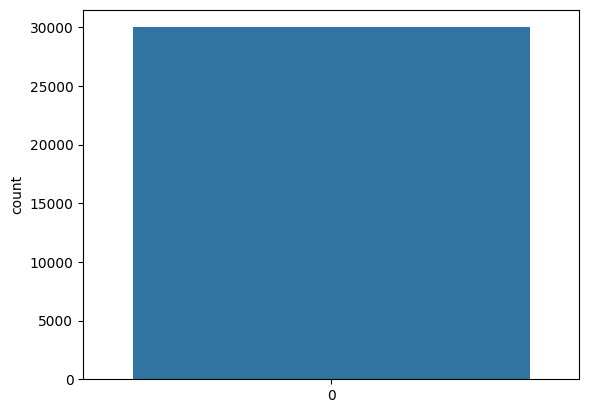

In [52]:
sns.countplot(credit_df['default.payment.next.month'])

In [53]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [54]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
X =credit_df.drop(['default.payment.next.month'], axis=1)
y = credit_df['default.payment.next.month']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(X,y)

In [55]:
x_sampled.shape

(46728, 24)

In [56]:
x_sampled = pd.DataFrame(data=x_sampled, columns=X.columns)


<Axes: ylabel='count'>

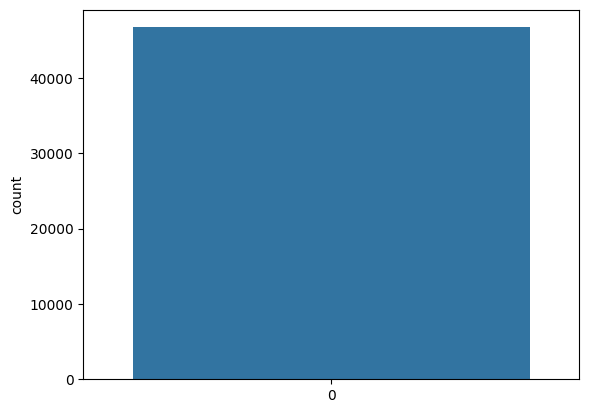

In [57]:
sns.countplot(y_sampled)

In [58]:
x_sampled.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,46728.000000,...,4.672800e+04,46728.000000,46728.000000,46728.000000,46728.000000,4.672800e+04,46728.000000,46728.000000,46728.000000,46728.000000
mean,14912.155303,154259.125150,1.590973,1.868986,1.543678,35.550248,0.230611,0.074110,0.024375,-0.046032,...,4.632332e+04,42850.706536,40083.426746,38642.629152,4849.318289,5.021435e+03,4583.951721,4262.374251,4227.938131,4585.097051
std,8624.266105,126119.962734,0.491659,0.769687,0.523607,9.381755,1.261605,1.338365,1.341614,1.330021,...,6.888319e+04,64370.983422,61093.898557,59457.319853,14489.994923,1.984436e+04,16429.814182,14180.455886,14161.036969,16496.585304
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7466.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.537500e+03,2301.000000,1712.750000,1240.000000,390.000000,3.900000e+02,199.000000,18.000000,1.000000,0.000000
50%,14883.500000,120000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.000200e+04,19104.000000,18305.000000,17491.000000,2000.000000,2.000000e+03,1522.000000,1233.000000,1300.000000,1217.000000
75%,22290.250000,220000.000000,2.000000,2.000000,2.000000,42.000000,1.000000,0.000000,0.000000,0.000000,...,5.871500e+04,52388.750000,49268.000000,48679.000000,4599.250000,4.400000e+03,4000.000000,3600.000000,3600.000000,3523.500000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [59]:
y_sampled.describe()

count    46728.000000
mean         0.500000
std          0.500005
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: default.payment.next.month, dtype: float64

In [60]:
# Print the sum of '0' and '1' in the resampled target variable
target_counts = Counter(y_sampled)
print("Class counts after RandomOverSampler:")
print("Class 0:", target_counts[0])
print("Class 1:", target_counts[1])

Class counts after RandomOverSampler:
Class 0: 23364
Class 1: 23364


***Handling Outliers***

In [61]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [62]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

<Axes: >

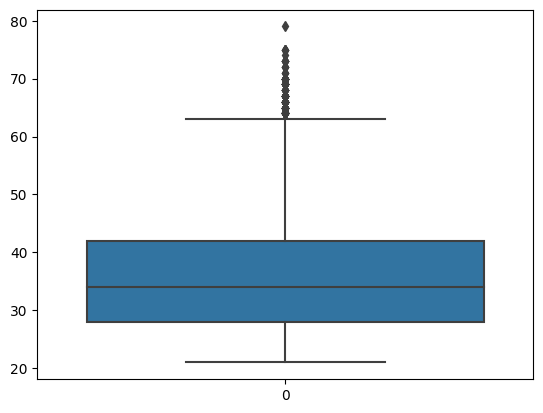

In [63]:
sns.boxplot(x_sampled['AGE'])

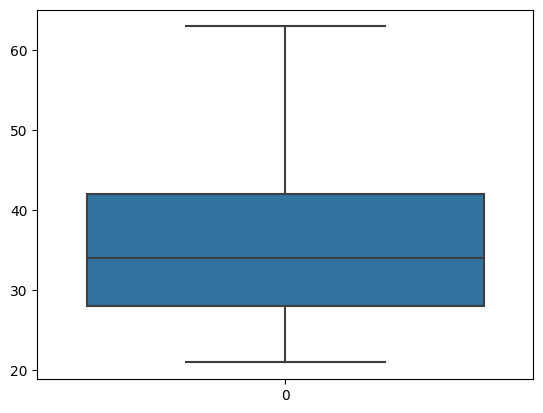

In [64]:
for i in x_sampled['AGE']:
  q1 = x_sampled['AGE'].quantile(0.25)
  q3 = x_sampled['AGE'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['AGE'] = x_sampled['AGE'].replace(
        i, np.median(x_sampled['AGE']))
sns.boxplot(x_sampled['AGE'])
plt.show()


<Axes: >

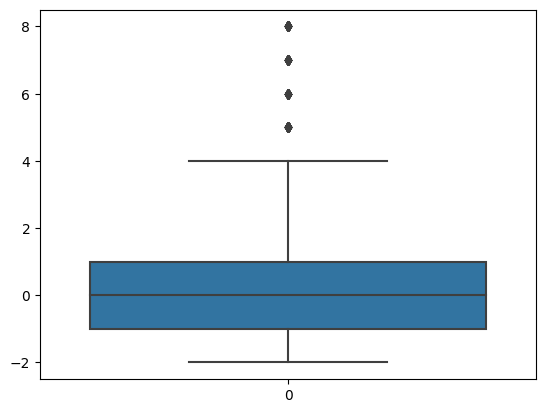

In [65]:
sns.boxplot(x_sampled['PAY_0'])


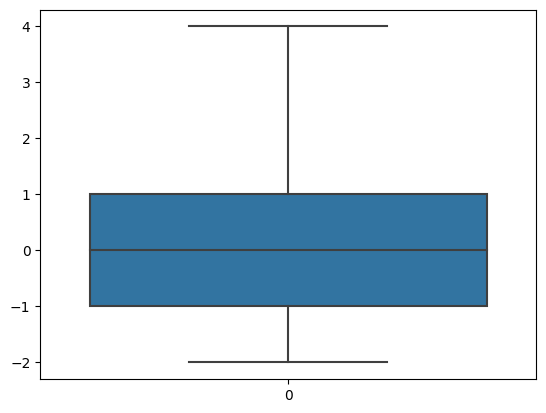

In [66]:
for i in x_sampled['PAY_0']:
  q1 = x_sampled['PAY_0'].quantile(0.25)
  q3 = x_sampled['PAY_0'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['PAY_0'] = x_sampled['PAY_0'].replace(
        i, np.median(x_sampled['PAY_0']))
sns.boxplot(x_sampled['PAY_0'])
plt.show()


<Axes: >

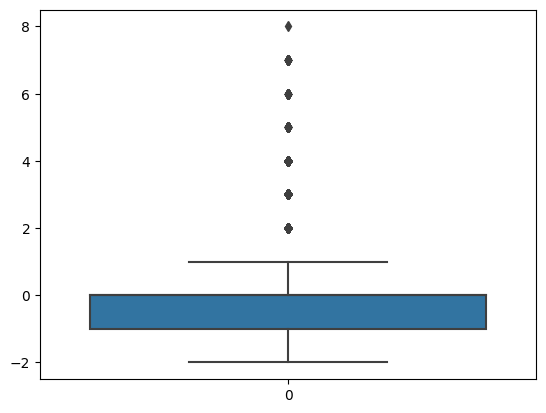

In [67]:
sns.boxplot(x_sampled['PAY_2'])


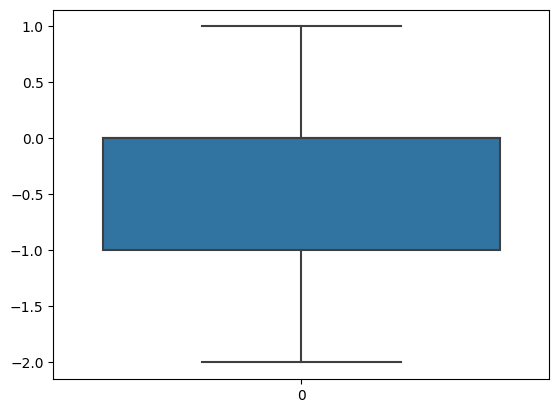

In [68]:
for i in x_sampled['PAY_2']:
  q1 = x_sampled['PAY_2'].quantile(0.25)
  q3 = x_sampled['PAY_2'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['PAY_2'] = x_sampled['PAY_2'].replace(
        i, np.median(x_sampled['PAY_2']))
sns.boxplot(x_sampled['PAY_2'])
plt.show()


<Axes: >

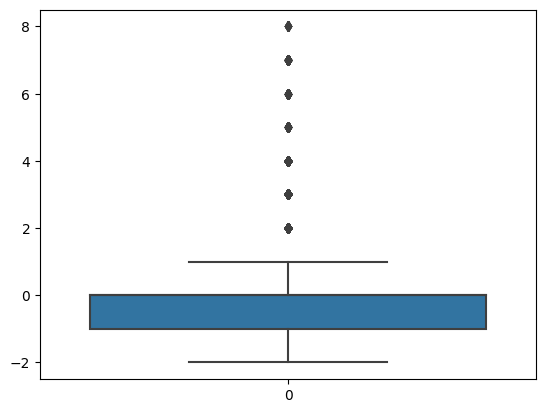

In [69]:
sns.boxplot(x_sampled['PAY_3'])


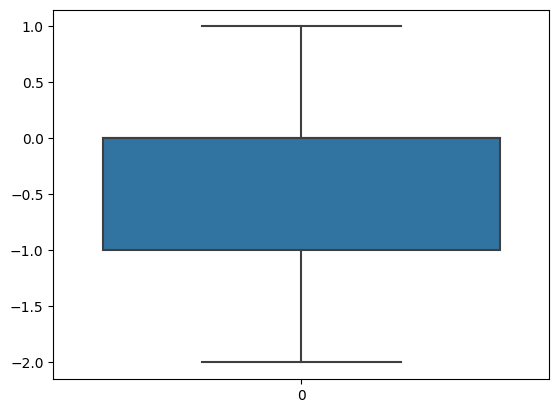

In [70]:
for i in x_sampled['PAY_3']:
  q1 = x_sampled['PAY_3'].quantile(0.25)
  q3 = x_sampled['PAY_3'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['PAY_3'] = x_sampled['PAY_3'].replace(
        i, np.median(x_sampled['PAY_3']))
sns.boxplot(x_sampled['PAY_3'])
plt.show()


<Axes: >

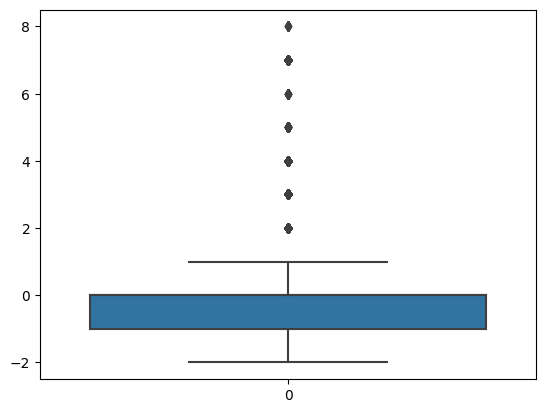

In [71]:
sns.boxplot(x_sampled['PAY_4'])

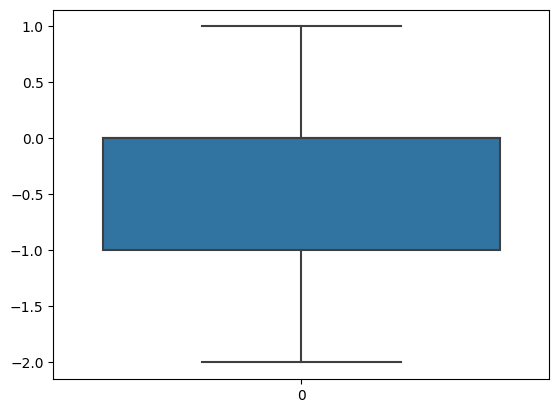

In [72]:
for i in x_sampled['PAY_4']:
  q1 = x_sampled['PAY_4'].quantile(0.25)
  q3 = x_sampled['PAY_4'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['PAY_4'] = x_sampled['PAY_4'].replace(
        i, np.median(x_sampled['PAY_4']))
sns.boxplot(x_sampled['PAY_4'])
plt.show()


<Axes: >

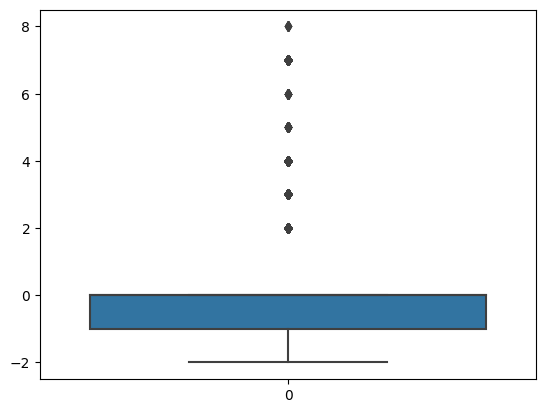

In [73]:
sns.boxplot(x_sampled['PAY_5'])

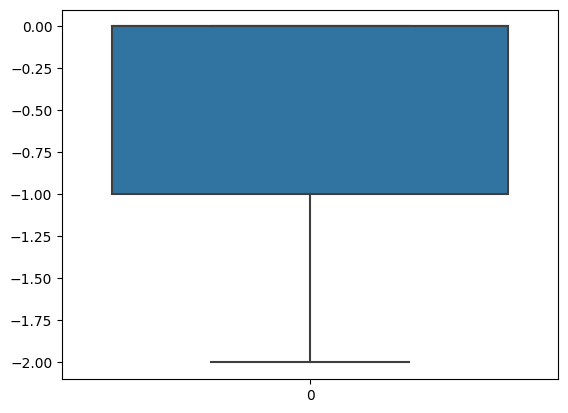

In [74]:
for i in x_sampled['PAY_5']:
  q1 = x_sampled['PAY_5'].quantile(0.25)
  q3 = x_sampled['PAY_5'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['PAY_5'] = x_sampled['PAY_5'].replace(
        i, np.median(x_sampled['PAY_5']))
sns.boxplot(x_sampled['PAY_5'])
plt.show()


<Axes: >

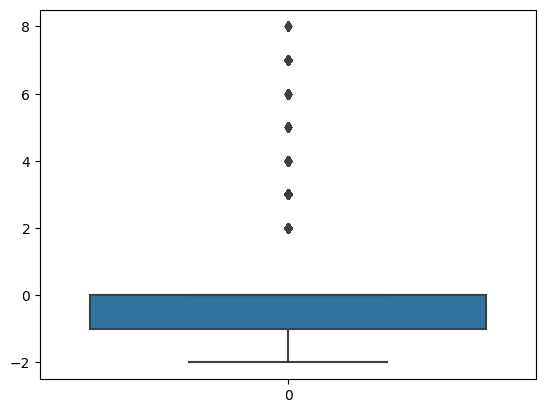

In [75]:
sns.boxplot(x_sampled['PAY_6'])


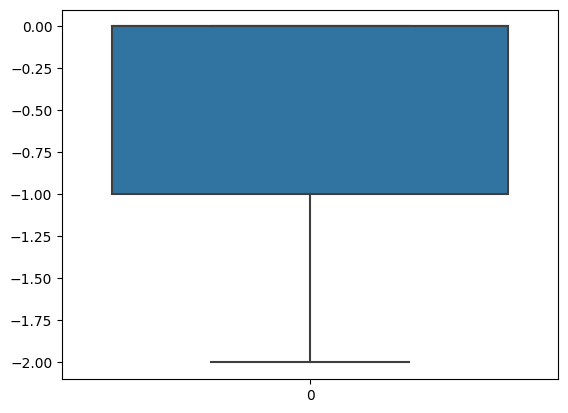

In [76]:
for i in x_sampled['PAY_6']:
  q1 = x_sampled['PAY_6'].quantile(0.25)
  q3 = x_sampled['PAY_6'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['PAY_6'] = x_sampled['PAY_6'].replace(
        i, np.median(x_sampled['PAY_6']))
sns.boxplot(x_sampled['PAY_6'])
plt.show()


<Axes: >

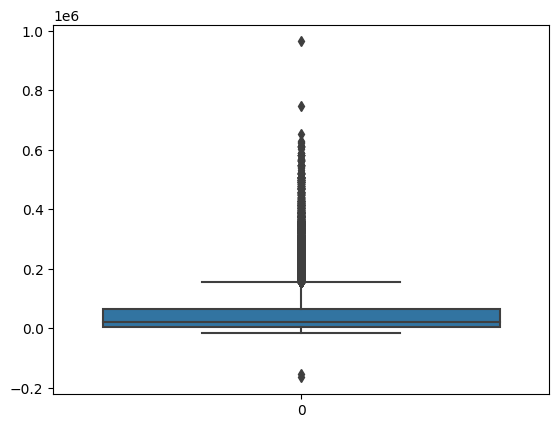

In [77]:
sns.boxplot(x_sampled['BILL_AMT1'])


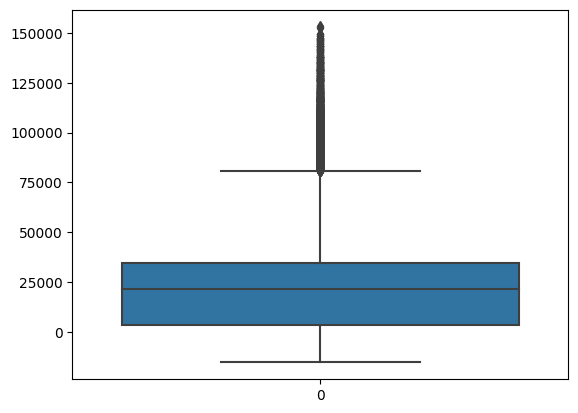

In [78]:
for i in x_sampled['BILL_AMT1']:
  q1 = x_sampled['BILL_AMT1'].quantile(0.25)
  q3 = x_sampled['BILL_AMT1'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['BILL_AMT1'] = x_sampled['BILL_AMT1'].replace(
        i, np.median(x_sampled['BILL_AMT1']))
sns.boxplot(x_sampled['BILL_AMT1'])
plt.show()

<Axes: >

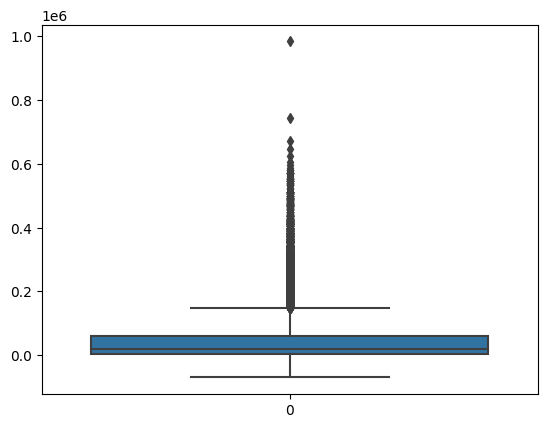

In [79]:
sns.boxplot(x_sampled['BILL_AMT2'])

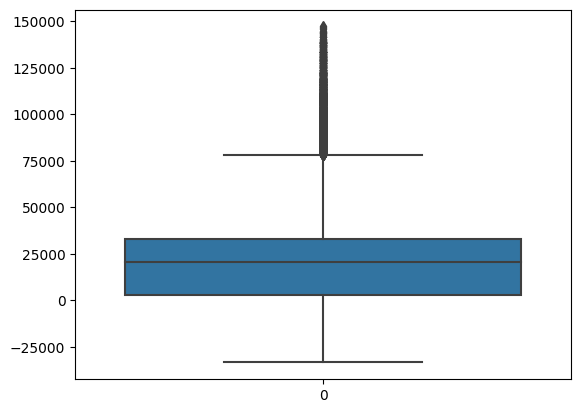

In [80]:
for i in x_sampled['BILL_AMT2']:
  q1 = x_sampled['BILL_AMT2'].quantile(0.25)
  q3 = x_sampled['BILL_AMT2'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['BILL_AMT2'] = x_sampled['BILL_AMT2'].replace(
        i, np.median(x_sampled['BILL_AMT2']))
sns.boxplot(x_sampled['BILL_AMT2'])
plt.show()


<Axes: >

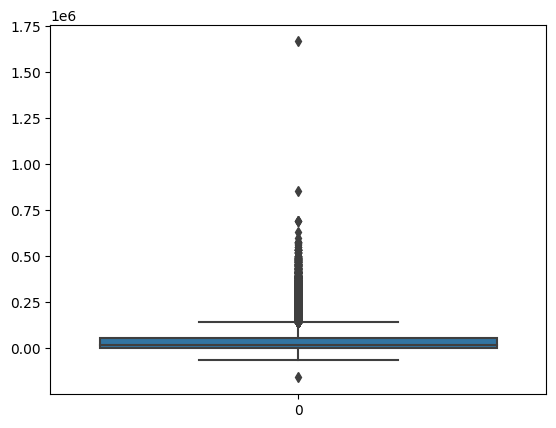

In [81]:
sns.boxplot(x_sampled['BILL_AMT3'])

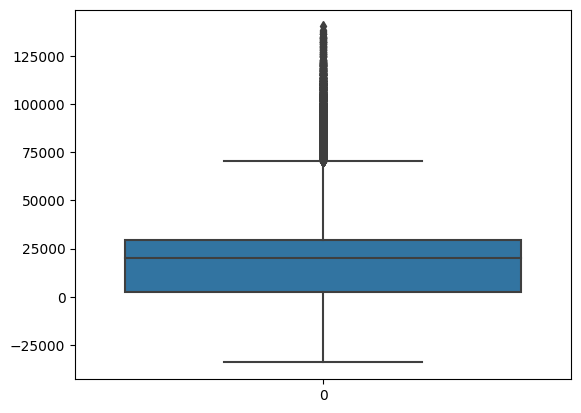

In [82]:
for i in x_sampled['BILL_AMT3']:
  q1 = x_sampled['BILL_AMT3'].quantile(0.25)
  q3 = x_sampled['BILL_AMT3'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['BILL_AMT3'] = x_sampled['BILL_AMT3'].replace(
        i, np.median(x_sampled['BILL_AMT3']))
sns.boxplot(x_sampled['BILL_AMT3'])
plt.show()


<Axes: >

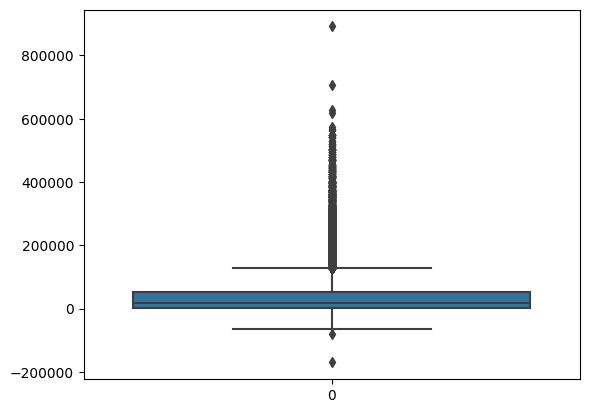

In [83]:
sns.boxplot(x_sampled['BILL_AMT4'])

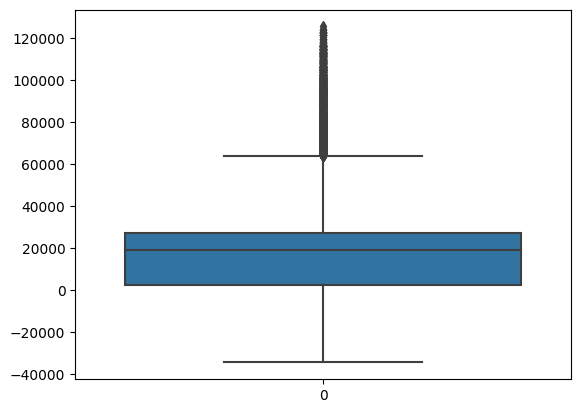

In [84]:
for i in x_sampled['BILL_AMT4']:
  q1 = x_sampled['BILL_AMT4'].quantile(0.25)
  q3 = x_sampled['BILL_AMT4'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['BILL_AMT4'] = x_sampled['BILL_AMT4'].replace(
        i, np.median(x_sampled['BILL_AMT4']))
sns.boxplot(x_sampled['BILL_AMT4'])
plt.show()


<Axes: >

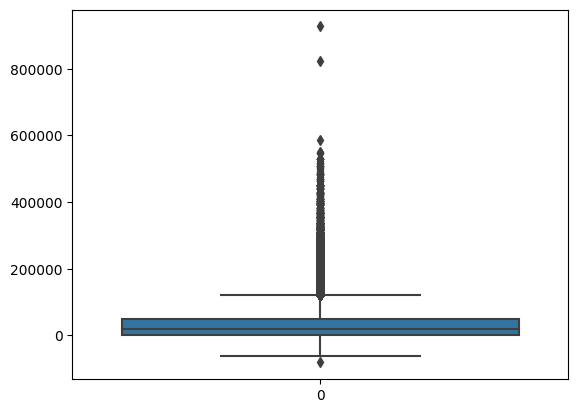

In [85]:
sns.boxplot(x_sampled['BILL_AMT5'])

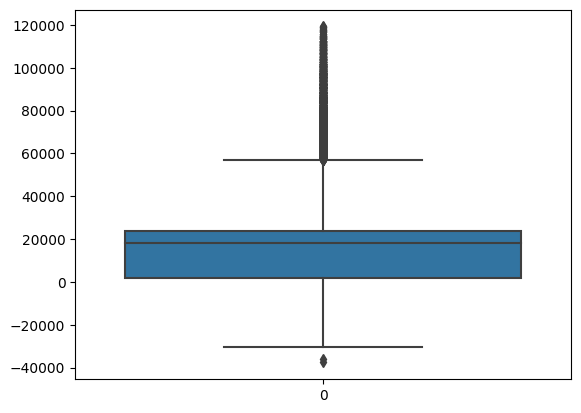

In [86]:
for i in x_sampled['BILL_AMT5']:
  q1 = x_sampled['BILL_AMT5'].quantile(0.25)
  q3 = x_sampled['BILL_AMT5'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['BILL_AMT5'] = x_sampled['BILL_AMT5'].replace(
        i, np.median(x_sampled['BILL_AMT5']))
sns.boxplot(x_sampled['BILL_AMT5'])
plt.show()


<Axes: >

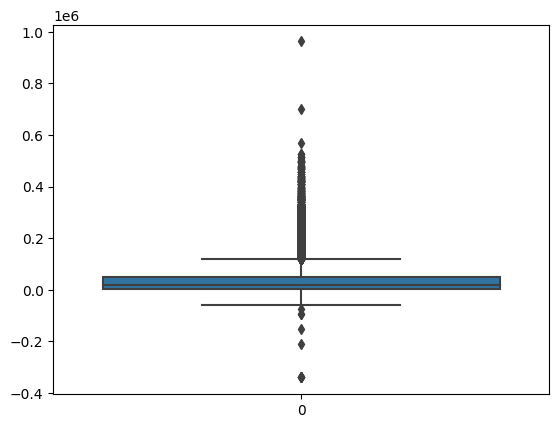

In [87]:
sns.boxplot(x_sampled['BILL_AMT6'])

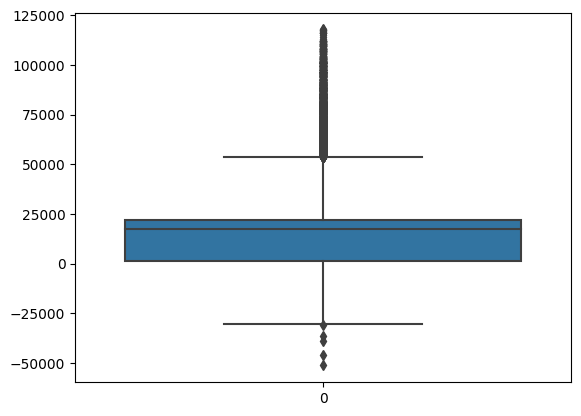

In [88]:
for i in x_sampled['BILL_AMT6']:
  q1 = x_sampled['BILL_AMT6'].quantile(0.25)
  q3 = x_sampled['BILL_AMT6'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['BILL_AMT6'] = x_sampled['BILL_AMT6'].replace(
        i, np.median(x_sampled['BILL_AMT6']))
sns.boxplot(x_sampled['BILL_AMT6'])
plt.show()


<Axes: >

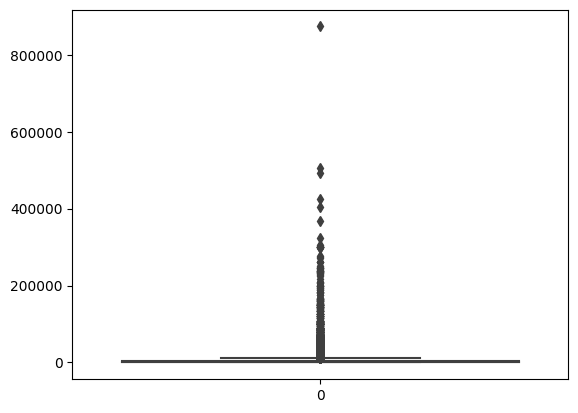

In [89]:
sns.boxplot(x_sampled['PAY_AMT1'])

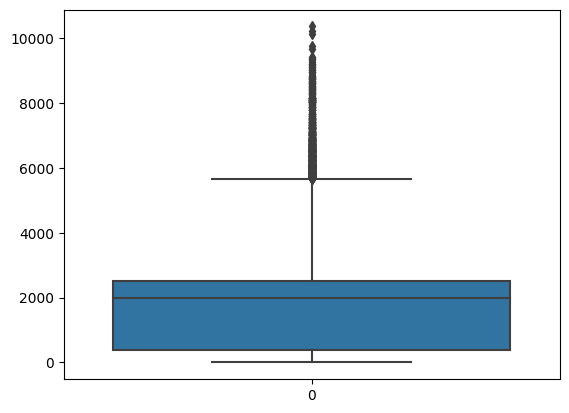

In [90]:
for i in x_sampled['PAY_AMT1']:
  q1 = x_sampled['PAY_AMT1'].quantile(0.25)
  q3 = x_sampled['PAY_AMT1'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['PAY_AMT1'] = x_sampled['PAY_AMT1'].replace(
        i, np.median(x_sampled['PAY_AMT1']))
sns.boxplot(x_sampled['PAY_AMT1'])
plt.show()


<Axes: >

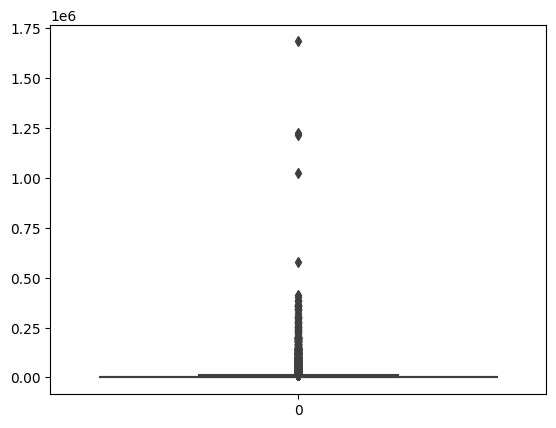

In [91]:
sns.boxplot(x_sampled['PAY_AMT2'])

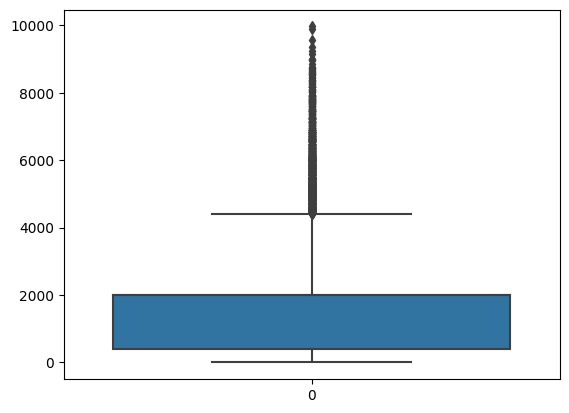

In [92]:
for i in x_sampled['PAY_AMT2']:
  q1 = x_sampled['PAY_AMT2'].quantile(0.25)
  q3 = x_sampled['PAY_AMT2'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['PAY_AMT2'] = x_sampled['PAY_AMT2'].replace(
        i, np.median(x_sampled['PAY_AMT2']))
sns.boxplot(x_sampled['PAY_AMT2'])
plt.show()


<Axes: >

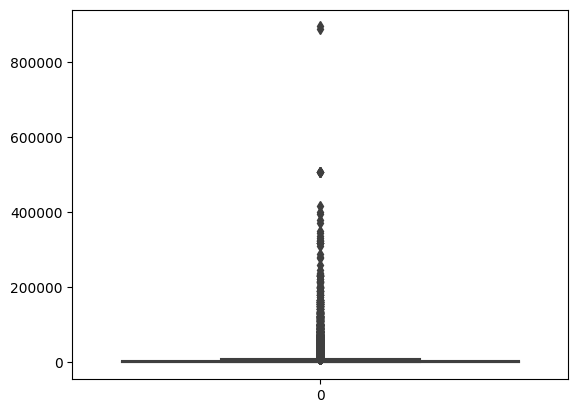

In [93]:
sns.boxplot(x_sampled['PAY_AMT3'])

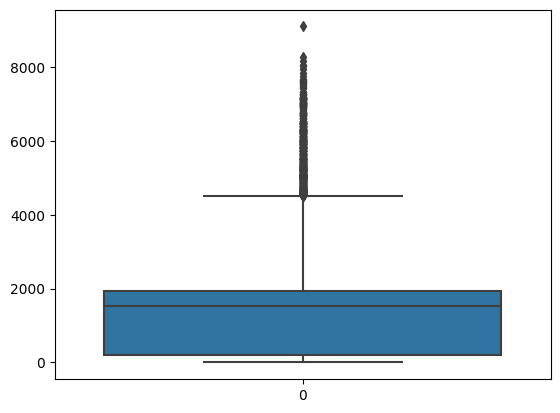

In [94]:
for i in x_sampled['PAY_AMT3']:
  q1 = x_sampled['PAY_AMT3'].quantile(0.25)
  q3 = x_sampled['PAY_AMT3'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['PAY_AMT3'] = x_sampled['PAY_AMT3'].replace(
        i, np.median(x_sampled['PAY_AMT3']))
sns.boxplot(x_sampled['PAY_AMT3'])
plt.show()


<Axes: >

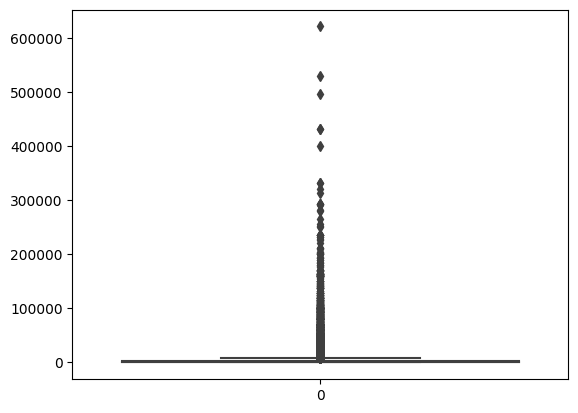

In [95]:
sns.boxplot(x_sampled['PAY_AMT4'])

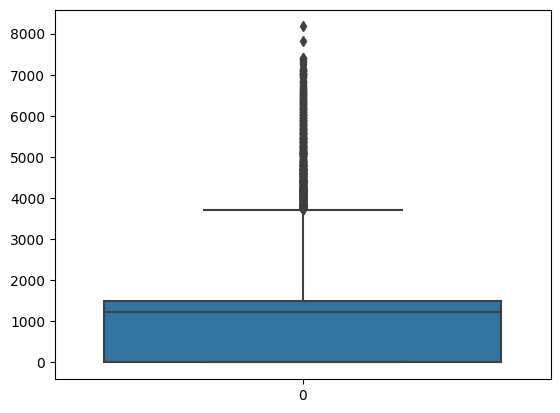

In [96]:
for i in x_sampled['PAY_AMT4']:
  q1 = x_sampled['PAY_AMT4'].quantile(0.25)
  q3 = x_sampled['PAY_AMT4'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['PAY_AMT4'] = x_sampled['PAY_AMT4'].replace(
        i, np.median(x_sampled['PAY_AMT4']))
sns.boxplot(x_sampled['PAY_AMT4'])
plt.show()


<Axes: >

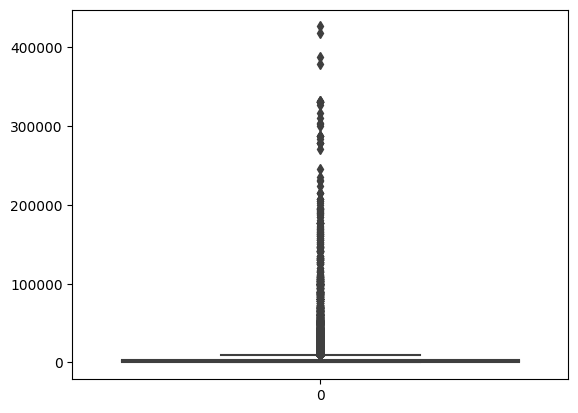

In [97]:
sns.boxplot(x_sampled['PAY_AMT5'])

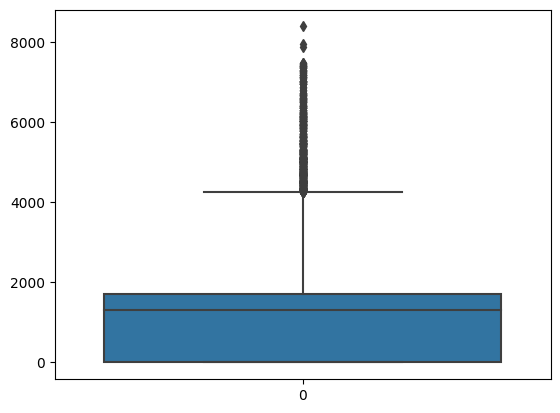

In [98]:
for i in x_sampled['PAY_AMT5']:
  q1 = x_sampled['PAY_AMT5'].quantile(0.25)
  q3 = x_sampled['PAY_AMT5'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['PAY_AMT5'] = x_sampled['PAY_AMT5'].replace(
        i, np.median(x_sampled['PAY_AMT5']))
sns.boxplot(x_sampled['PAY_AMT5'])
plt.show()


<Axes: >

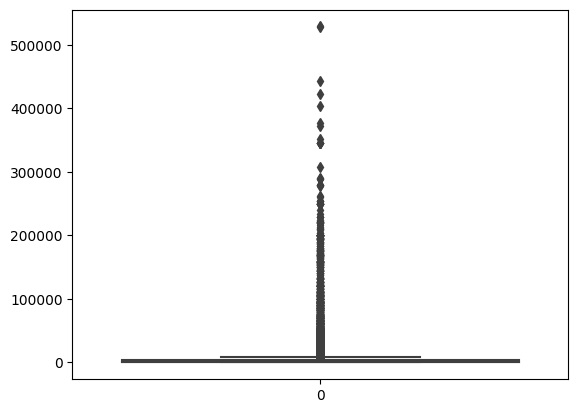

In [99]:
sns.boxplot(x_sampled['PAY_AMT6'])

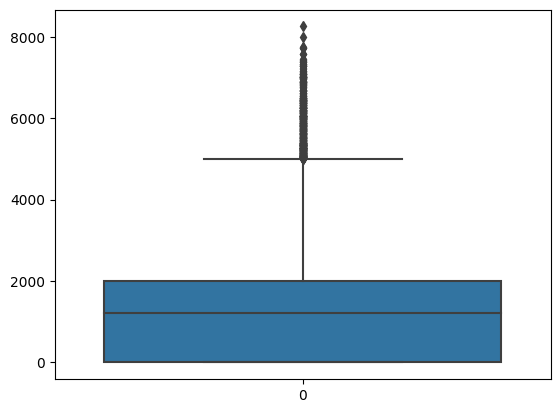

In [100]:
for i in x_sampled['PAY_AMT6']:
  q1 = x_sampled['PAY_AMT6'].quantile(0.25)
  q3 = x_sampled['PAY_AMT6'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1-1.5*iqr
  Upper_tail = q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    x_sampled['PAY_AMT6'] = x_sampled['PAY_AMT6'].replace(
        i, np.median(x_sampled['PAY_AMT6']))
sns.boxplot(x_sampled['PAY_AMT6'])
plt.show()


In [101]:
res = pd.DataFrame(x_sampled)
res['default_payment'] = y_sampled
print(len(res))

46728


In [102]:
res.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000.0,2,2,1,24,2,0,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,2000.0,1522.0,1233.0,689.0,679.0,0


# ***Feature Selection***

In [103]:
res.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000.0,2,2,1,24,2,0,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,2000.0,1522.0,1233.0,689.0,679.0,0


In [104]:
credit_df1 = res.drop(['ID'], axis=1)
credit_df1


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000.0,2,2,1,24,2,0,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,0,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,2000.0,1522.0,1233.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,230000.0,2,2,1,43,0,0,0,0,0,...,19104.0,18305.0,17491.0,2000.0,2000.0,1522.0,1233.0,1300.0,1217.0,1
46724,50000.0,2,2,1,22,0,0,0,0,0,...,36754.0,16943.0,16234.0,1550.0,1750.0,2270.0,603.0,713.0,1000.0,1
46725,90000.0,2,2,2,25,0,0,0,0,0,...,19104.0,18305.0,17491.0,3600.0,3805.0,3100.0,3200.0,4100.0,2500.0,1
46726,50000.0,2,2,1,32,-1,-1,-1,-1,-1,...,390.0,930.0,390.0,390.0,390.0,390.0,930.0,0.0,780.0,1


# ***Splitting The Dataset***

In [105]:
credit_df1['SEX'] = credit_df1['SEX'].replace({'M': 1, 'F': 2})


In [106]:
X = credit_df1.drop(['default_payment'], axis=1)
y = credit_df1['default_payment']

In [107]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,0,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,0,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,2000.0,1522.0,1233.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,230000.0,2,2,1,43,0,0,0,0,0,...,20000.0,19104.0,18305.0,17491.0,2000.0,2000.0,1522.0,1233.0,1300.0,1217.0
46724,50000.0,2,2,1,22,0,0,0,0,0,...,35625.0,36754.0,16943.0,16234.0,1550.0,1750.0,2270.0,603.0,713.0,1000.0
46725,90000.0,2,2,2,25,0,0,0,0,0,...,20000.0,19104.0,18305.0,17491.0,3600.0,3805.0,3100.0,3200.0,4100.0,2500.0
46726,50000.0,2,2,1,32,-1,-1,-1,-1,-1,...,390.0,390.0,930.0,390.0,390.0,390.0,390.0,930.0,0.0,780.0


In [108]:
y

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: default_payment, Length: 46728, dtype: int64

In [109]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

# ***Cross Validation***

***K-fold***

In [110]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model=RandomForestClassifier()
from sklearn import tree
kfold_validation=KFold(n_splits=10, random_state = 42, shuffle=True)

In [111]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, X, y, cv=kfold_validation)
print(results)
print(np.mean(results))

[0.94671517 0.94842713 0.94757115 0.94457522 0.95227905 0.94864113
 0.95227905 0.94436122 0.94606164 0.94049658]
0.9471407352497151


# ***Random Forest***

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format(
    (cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format(
    (cm_test[0][0] + cm_test[1][1])/len(y_test)))

pred_prob1 = classifier.predict_proba(X_test)

# AUC scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:, 1])

print(" AUC Score:", auc_score1)

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))


Accuracy for training set for Random Forest = 0.9991439664924027
Accuracy for test set for Random Forest = 0.9214637277979885
 AUC Score: 0.9727231041764808
[[6237  715]
 [ 386 6681]]


              precision    recall  f1-score   support

           0       0.94      0.90      0.92      6952
           1       0.90      0.95      0.92      7067

    accuracy                           0.92     14019
   macro avg       0.92      0.92      0.92     14019
weighted avg       0.92      0.92      0.92     14019



# ***Logistics Regression***

In [113]:
import time
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train, y_train)

start = time.time()

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
pred_prob2 = classifier.predict_proba(X_test)

# AUC scores
auc_score2 = roc_auc_score(y_test, pred_prob1[:, 1])

print(" AUC Score:", auc_score1)

print()
print('Accuracy for training set for Logistic Regression = {}'.format(
    (cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format(
    (cm_test[0][0] + cm_test[1][1])/len(y_test)))

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
end = time.time()
diff = end - start
print('Execution time:', diff)


 AUC Score: 0.9727231041764808

Accuracy for training set for Logistic Regression = 0.507872451007368
Accuracy for test set for Logistic Regression = 0.5030315999714673
[[6801  151]
 [6816  251]]


              precision    recall  f1-score   support

           0       0.50      0.98      0.66      6952
           1       0.62      0.04      0.07      7067

    accuracy                           0.50     14019
   macro avg       0.56      0.51      0.36     14019
weighted avg       0.56      0.50      0.36     14019

Execution time: 0.04508686065673828


e:\i-neuron_internship\env_ineuron\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
import pickle
pickle.dump(classifier, open('model.pkl', 'wb'))
pickle_read = pickle.load(open('model.pkl', 'rb'))
